# Ordering by metrics and retraining phase

## Dataset: Intel

## Configuration 3

In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model

In [ ]:
cd '../utils/'

In [2]:
import utils_guided_retraining as utils

In [ ]:
cd '../notebooks/'

In [3]:

x_train,y_train = utils.get_data("intel","Train")
x_val,y_val = utils.get_data("intel","Val")
x_test,y_test = utils.get_data("intel","Test")

In [4]:
x_train_and_adversary,y_train_and_adversary = utils.get_data("intel","Train_and_adversary")

In [5]:
# Data for retraining

x_adversary_training = x_train_and_adversary[len(x_train):]
print(len(x_adversary_training))
y_adversary_training = y_train_and_adversary[len(y_train):]

print(len(y_adversary_training))

3000
3000


In [6]:
# Obtaining adversarial examples for testing 
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data("intel",'Test_fgsm') 

In [7]:
x_adversary_test_fgsm = x_test_and_adversary[len(x_test):]
print(len(x_adversary_test_fgsm))
y_adversary_test_fgsm = y_test_and_adversary[len(y_test):]

print(len(y_adversary_test_fgsm))

3000
3000


In [8]:
# Obtaining SA values just of the adversarial inputs

save_dir_lsa = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/intel_lsa_values_2.npy"

lsa_values = np.load(save_dir_lsa)[len(x_train):] 

save_dir_dsa = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/intel_dsa_values_2.npy"

dsa_values = np.load(save_dir_dsa)[len(x_train):]

In [10]:
dsa_values.shape

(3000,)

In [10]:

# Obtaining top n images by LSA values
top_images_by_lsa = utils.get_x_of_indexes(list(np.flip(np.argsort(lsa_values))),x_adversary_training)
top_labels_by_lsa = utils.get_x_of_indexes(list(np.flip(np.argsort(lsa_values))),y_adversary_training)


In [11]:
# Obtaining top n images by DSA values
top_images_by_dsa = utils.get_x_of_indexes(list(np.flip(np.argsort(dsa_values))),x_adversary_training)
top_labels_by_dsa = utils.get_x_of_indexes(list(np.flip(np.argsort(dsa_values))),y_adversary_training)

In [12]:

model_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10/"

model_original = utils.My_model("intel",True, model_dir)

Model loaded correctly


## LSA

In [13]:
len(top_images_by_lsa)

3000

In [14]:
m = 150 # Parameter to change
n = 0
image_sets_lsa = []
label_sets_lsa = []


for i in range(len(top_images_by_lsa)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_lsa)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_lsa)%m))
        top_images_by_lsa_n = np.array(top_images_by_lsa[:n+m+(len(top_images_by_lsa)%m)])
        top_labels_by_lsa_n = np.array(top_labels_by_lsa[:n+m+(len(top_images_by_lsa)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_lsa_n = np.array(top_images_by_lsa[:n+m])
        top_labels_by_lsa_n = np.array(top_labels_by_lsa[:n+m])
    image_sets_lsa.append(top_images_by_lsa_n)
    label_sets_lsa.append(top_labels_by_lsa_n)
    print(len(top_images_by_lsa_n))
    n += m



0 :
0  ->  150
150
1 :
0  ->  300
300
2 :
0  ->  450
450
3 :
0  ->  600
600
4 :
0  ->  750
750
5 :
0  ->  900
900
6 :
0  ->  1050
1050
7 :
0  ->  1200
1200
8 :
0  ->  1350
1350
9 :
0  ->  1500
1500
10 :
0  ->  1650
1650
11 :
0  ->  1800
1800
12 :
0  ->  1950
1950
13 :
0  ->  2100
2100
14 :
0  ->  2250
2250
15 :
0  ->  2400
2400
16 :
0  ->  2550
2550
17 :
0  ->  2700
2700
18 :
0  ->  2850
2850
19 :
Last
0  ->  3000
3000


In [19]:
print(model_dir)

models_lsa = []
for i in range(len(label_sets_lsa)):
    print(i,":")
    model = utils.My_model('intel',True,model_dir)
    model.compile_model()
    models_lsa.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10/
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [20]:
n=0
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 2.4013 - accuracy: 0.2292 - val_loss: 1.2053 - val_accuracy: 0.5763
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 1.6220 - accuracy: 0.2971 - val_loss: 1.1150 - val_accuracy: 0.5510
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 1.4312 - accuracy: 0.4295 - val_loss: 0.9394 - val_accuracy: 0.6683
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 1.3165 - accuracy: 0.4540 - val_loss: 1.0444 - val_accuracy: 0.5663
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 1.4345 - accuracy: 0.4402 - val_loss: 1.1038 - val_accuracy: 0.5688
Epoch 6/20
2/2 [==============================] - 2s 2s/step - loss: 1.3375 - accuracy: 0.4922 - val_loss: 0.8930 - val_accuracy: 0.6765
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 1.4482 - accuracy: 0.3969 - val_loss: 1.0702 - val_accuracy: 0.5685
Epoch 8/20
2/2 [=======================

In [21]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 2.3374 - accuracy: 0.2227 - val_loss: 1.1918 - val_accuracy: 0.6159
Epoch 2/20
3/3 [==============================] - 2s 1s/step - loss: 1.5441 - accuracy: 0.3697 - val_loss: 0.8687 - val_accuracy: 0.7118
Epoch 3/20
3/3 [==============================] - 2s 1s/step - loss: 1.3748 - accuracy: 0.4871 - val_loss: 0.8341 - val_accuracy: 0.7211
Epoch 4/20
3/3 [==============================] - 2s 1s/step - loss: 1.2338 - accuracy: 0.4460 - val_loss: 0.8833 - val_accuracy: 0.6687
Epoch 5/20
3/3 [==============================] - 2s 1s/step - loss: 1.2844 - accuracy: 0.4963 - val_loss: 0.8863 - val_accuracy: 0.6919
Epoch 6/20
3/3 [==============================] - 2s 1s/step - loss: 1.2442 - accuracy: 0.4958 - val_loss: 0.9421 - val_accuracy: 0.6669
Epoch 7/20
3/3 [==============================] - 2s 1s/step - loss: 1.4705 - accuracy: 0.4674 - val_loss: 0.8374 - val_accuracy: 0.7019
Epoch 8/20
3/3 [=======================

In [22]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
4/4 [==============================] - 5s 960ms/step - loss: 2.4621 - accuracy: 0.1965 - val_loss: 0.9139 - val_accuracy: 0.7468
Epoch 2/20
4/4 [==============================] - 3s 799ms/step - loss: 1.4707 - accuracy: 0.3625 - val_loss: 0.9277 - val_accuracy: 0.7247
Epoch 3/20
4/4 [==============================] - 3s 811ms/step - loss: 1.2590 - accuracy: 0.5105 - val_loss: 0.7861 - val_accuracy: 0.7414
Epoch 4/20
4/4 [==============================] - 3s 799ms/step - loss: 1.3098 - accuracy: 0.4969 - val_loss: 1.1589 - val_accuracy: 0.6052
Epoch 5/20
4/4 [==============================] - 3s 819ms/step - loss: 1.3503 - accuracy: 0.4661 - val_loss: 0.9094 - val_accuracy: 0.6879
Epoch 6/20
4/4 [==============================] - 3s 811ms/step - loss: 1.1697 - accuracy: 0.4907 - val_loss: 0.8743 - val_accuracy: 0.6769
Epoch 7/20
4/4 [==============================] - 3s 834ms/step - loss: 1.1731 - accuracy: 0.5543 - val_loss: 0.8263 - val_accuracy: 0.6965
Epoch 8/20
4/4 [==

In [23]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
5/5 [==============================] - 5s 805ms/step - loss: 2.2213 - accuracy: 0.2388 - val_loss: 1.1212 - val_accuracy: 0.6958
Epoch 2/20
5/5 [==============================] - 3s 718ms/step - loss: 1.4473 - accuracy: 0.4331 - val_loss: 0.9784 - val_accuracy: 0.6801
Epoch 3/20
5/5 [==============================] - 3s 711ms/step - loss: 1.3171 - accuracy: 0.4962 - val_loss: 0.9806 - val_accuracy: 0.7093
Epoch 4/20
5/5 [==============================] - 3s 702ms/step - loss: 1.2519 - accuracy: 0.5020 - val_loss: 0.9452 - val_accuracy: 0.7011
Epoch 5/20
5/5 [==============================] - 3s 711ms/step - loss: 1.1976 - accuracy: 0.5176 - val_loss: 0.9348 - val_accuracy: 0.6815
Epoch 6/20
5/5 [==============================] - 3s 708ms/step - loss: 1.1128 - accuracy: 0.5485 - val_loss: 1.0081 - val_accuracy: 0.6676
Epoch 7/20
5/5 [==============================] - 3s 710ms/step - loss: 1.1505 - accuracy: 0.5375 - val_loss: 0.9024 - val_accuracy: 0.6997
Epoch 8/20
5/5 [==

In [24]:
print(n)#4

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
6/6 [==============================] - 6s 715ms/step - loss: 2.0425 - accuracy: 0.2470 - val_loss: 1.0198 - val_accuracy: 0.7158
Epoch 2/20
6/6 [==============================] - 3s 621ms/step - loss: 1.3775 - accuracy: 0.4398 - val_loss: 1.0144 - val_accuracy: 0.6451
Epoch 3/20
6/6 [==============================] - 3s 624ms/step - loss: 1.3787 - accuracy: 0.4473 - val_loss: 0.9557 - val_accuracy: 0.6676
Epoch 4/20
6/6 [==============================] - 3s 642ms/step - loss: 1.2056 - accuracy: 0.5222 - val_loss: 0.8919 - val_accuracy: 0.6801
Epoch 5/20
6/6 [==============================] - 3s 638ms/step - loss: 1.1083 - accuracy: 0.5667 - val_loss: 1.0360 - val_accuracy: 0.6302
Epoch 6/20
6/6 [==============================] - 3s 639ms/step - loss: 1.1582 - accuracy: 0.5703 - val_loss: 0.8599 - val_accuracy: 0.7140
Epoch 7/20
6/6 [==============================] - 3s 641ms/step - loss: 1.1272 - accuracy: 0.5463 - val_loss: 0.9532 - val_accuracy: 0.6812
Epoch 8/20
6/6 [==

In [25]:
print(n)#5

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
8/8 [==============================] - 6s 592ms/step - loss: 2.1238 - accuracy: 0.2852 - val_loss: 1.3042 - val_accuracy: 0.4226
Epoch 2/20
8/8 [==============================] - 4s 530ms/step - loss: 1.5301 - accuracy: 0.3825 - val_loss: 0.9138 - val_accuracy: 0.6897
Epoch 3/20
8/8 [==============================] - 4s 558ms/step - loss: 1.2650 - accuracy: 0.5199 - val_loss: 1.0644 - val_accuracy: 0.5624
Epoch 4/20
8/8 [==============================] - 4s 513ms/step - loss: 1.3190 - accuracy: 0.4863 - val_loss: 1.2252 - val_accuracy: 0.5728
Epoch 5/20
8/8 [==============================] - 4s 473ms/step - loss: 1.2614 - accuracy: 0.5294 - val_loss: 0.9412 - val_accuracy: 0.6131
Epoch 6/20
8/8 [==============================] - 4s 472ms/step - loss: 1.1673 - accuracy: 0.5483 - val_loss: 0.9402 - val_accuracy: 0.6519
Epoch 7/20
8/8 [==============================] - 4s 495ms/step - loss: 1.1881 - accuracy: 0.5551 - val_loss: 0.9643 - val_accuracy: 0.6255
Epoch 8/20
8/8 [==

In [26]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
9/9 [==============================] - 6s 497ms/step - loss: 2.4129 - accuracy: 0.2257 - val_loss: 1.0442 - val_accuracy: 0.6883
Epoch 2/20
9/9 [==============================] - 4s 436ms/step - loss: 1.3734 - accuracy: 0.4585 - val_loss: 0.8859 - val_accuracy: 0.6897
Epoch 3/20
9/9 [==============================] - 4s 443ms/step - loss: 1.2997 - accuracy: 0.4876 - val_loss: 1.0687 - val_accuracy: 0.6088
Epoch 4/20
9/9 [==============================] - 4s 448ms/step - loss: 1.2613 - accuracy: 0.4984 - val_loss: 1.2675 - val_accuracy: 0.5232
Epoch 5/20
9/9 [==============================] - 4s 455ms/step - loss: 1.2715 - accuracy: 0.5264 - val_loss: 0.9297 - val_accuracy: 0.6751
Epoch 6/20
9/9 [==============================] - 4s 456ms/step - loss: 1.1329 - accuracy: 0.5536 - val_loss: 0.8900 - val_accuracy: 0.6409
Epoch 7/20
9/9 [==============================] - 4s 460ms/step - loss: 1.0483 - accuracy: 0.5924 - val_loss: 1.1870 - val_accuracy: 0.5660
Epoch 8/20
9/9 [==

In [27]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
10/10 [==============================] - 6s 478ms/step - loss: 2.3603 - accuracy: 0.2634 - val_loss: 1.0697 - val_accuracy: 0.6416
Epoch 2/20
10/10 [==============================] - 4s 428ms/step - loss: 1.3067 - accuracy: 0.4802 - val_loss: 1.0211 - val_accuracy: 0.5870
Epoch 3/20
10/10 [==============================] - 4s 448ms/step - loss: 1.2618 - accuracy: 0.5043 - val_loss: 0.9499 - val_accuracy: 0.6398
Epoch 4/20
10/10 [==============================] - 4s 442ms/step - loss: 1.2230 - accuracy: 0.5323 - val_loss: 0.9547 - val_accuracy: 0.6498
Epoch 5/20
10/10 [==============================] - 4s 436ms/step - loss: 1.1653 - accuracy: 0.5509 - val_loss: 0.8730 - val_accuracy: 0.6740
Epoch 6/20
10/10 [==============================] - 4s 466ms/step - loss: 1.0294 - accuracy: 0.6055 - val_loss: 1.0014 - val_accuracy: 0.6419
Epoch 7/20
10/10 [==============================] - 5s 481ms/step - loss: 1.0591 - accuracy: 0.5881 - val_loss: 0.8887 - val_accuracy: 0.6537
Epoc

In [28]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
11/11 [==============================] - 7s 494ms/step - loss: 2.2580 - accuracy: 0.2601 - val_loss: 1.1314 - val_accuracy: 0.5728
Epoch 2/20
11/11 [==============================] - 5s 455ms/step - loss: 1.3898 - accuracy: 0.4656 - val_loss: 0.9711 - val_accuracy: 0.6712
Epoch 3/20
11/11 [==============================] - 5s 450ms/step - loss: 1.2122 - accuracy: 0.5368 - val_loss: 1.0343 - val_accuracy: 0.6337
Epoch 4/20
11/11 [==============================] - 5s 448ms/step - loss: 1.1333 - accuracy: 0.5668 - val_loss: 0.9247 - val_accuracy: 0.6519
Epoch 5/20
11/11 [==============================] - 5s 447ms/step - loss: 1.0986 - accuracy: 0.5906 - val_loss: 0.8954 - val_accuracy: 0.6633
Epoch 6/20
11/11 [==============================] - 5s 451ms/step - loss: 1.0111 - accuracy: 0.6029 - val_loss: 0.9240 - val_accuracy: 0.6462
Epoch 7/20
11/11 [==============================] - 5s 462ms/step - loss: 0.9649 - accuracy: 0.6218 - val_loss: 0.9057 - val_accuracy: 0.6576
Epoc

In [29]:
print(n)#9

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
12/12 [==============================] - 8s 521ms/step - loss: 2.2872 - accuracy: 0.2757 - val_loss: 1.1027 - val_accuracy: 0.6473
Epoch 2/20
12/12 [==============================] - 6s 498ms/step - loss: 1.3396 - accuracy: 0.4770 - val_loss: 0.9726 - val_accuracy: 0.6594
Epoch 3/20
12/12 [==============================] - 6s 516ms/step - loss: 1.2335 - accuracy: 0.5148 - val_loss: 0.8928 - val_accuracy: 0.6933
Epoch 4/20
12/12 [==============================] - 6s 531ms/step - loss: 1.2176 - accuracy: 0.5286 - val_loss: 0.9052 - val_accuracy: 0.6651
Epoch 5/20
12/12 [==============================] - 6s 519ms/step - loss: 1.1310 - accuracy: 0.5701 - val_loss: 1.0237 - val_accuracy: 0.6127
Epoch 6/20
12/12 [==============================] - 6s 542ms/step - loss: 1.0232 - accuracy: 0.6108 - val_loss: 0.9637 - val_accuracy: 0.6419
Epoch 7/20
12/12 [==============================] - 6s 546ms/step - loss: 1.0201 - accuracy: 0.6198 - val_loss: 0.9446 - val_accuracy: 0.6409
Epoc

In [30]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
13/13 [==============================] - 9s 515ms/step - loss: 2.1538 - accuracy: 0.2626 - val_loss: 1.0300 - val_accuracy: 0.6605
Epoch 2/20
13/13 [==============================] - 6s 443ms/step - loss: 1.2771 - accuracy: 0.4795 - val_loss: 0.9608 - val_accuracy: 0.6576
Epoch 3/20
13/13 [==============================] - 6s 463ms/step - loss: 1.1694 - accuracy: 0.5254 - val_loss: 0.9653 - val_accuracy: 0.6484
Epoch 4/20
13/13 [==============================] - 6s 450ms/step - loss: 1.1549 - accuracy: 0.5464 - val_loss: 0.9967 - val_accuracy: 0.6658
Epoch 5/20
13/13 [==============================] - 6s 476ms/step - loss: 1.0693 - accuracy: 0.5733 - val_loss: 0.8941 - val_accuracy: 0.6730
Epoch 6/20
13/13 [==============================] - 8s 592ms/step - loss: 1.0506 - accuracy: 0.5909 - val_loss: 0.8494 - val_accuracy: 0.6979
Epoch 7/20
13/13 [==============================] - 6s 456ms/step - loss: 1.0292 - accuracy: 0.6051 - val_loss: 0.9017 - val_accuracy: 0.6772
Epo

In [31]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
15/15 [==============================] - 9s 425ms/step - loss: 2.1793 - accuracy: 0.2797 - val_loss: 1.1693 - val_accuracy: 0.5599
Epoch 2/20
15/15 [==============================] - 6s 399ms/step - loss: 1.3642 - accuracy: 0.4245 - val_loss: 1.0178 - val_accuracy: 0.6312
Epoch 3/20
15/15 [==============================] - 6s 396ms/step - loss: 1.1985 - accuracy: 0.5255 - val_loss: 1.0882 - val_accuracy: 0.6113
Epoch 4/20
15/15 [==============================] - 6s 402ms/step - loss: 1.2434 - accuracy: 0.5049 - val_loss: 1.0039 - val_accuracy: 0.6369
Epoch 5/20
15/15 [==============================] - 6s 404ms/step - loss: 1.0908 - accuracy: 0.5570 - val_loss: 0.8490 - val_accuracy: 0.6994
Epoch 6/20
15/15 [==============================] - 6s 412ms/step - loss: 1.0933 - accuracy: 0.5577 - val_loss: 0.9135 - val_accuracy: 0.6673
Epoch 7/20
15/15 [==============================] - 6s 412ms/step - loss: 0.9602 - accuracy: 0.6168 - val_loss: 0.9943 - val_accuracy: 0.6352
Epo

In [32]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
16/16 [==============================] - 9s 460ms/step - loss: 2.2317 - accuracy: 0.2859 - val_loss: 1.2905 - val_accuracy: 0.5471
Epoch 2/20
16/16 [==============================] - 7s 416ms/step - loss: 1.3408 - accuracy: 0.4601 - val_loss: 0.9703 - val_accuracy: 0.6658
Epoch 3/20
16/16 [==============================] - 6s 382ms/step - loss: 1.2207 - accuracy: 0.4998 - val_loss: 0.9484 - val_accuracy: 0.6651
Epoch 4/20
16/16 [==============================] - 6s 381ms/step - loss: 1.1695 - accuracy: 0.5363 - val_loss: 1.0237 - val_accuracy: 0.6352
Epoch 5/20
16/16 [==============================] - 6s 382ms/step - loss: 1.1050 - accuracy: 0.5495 - val_loss: 0.9110 - val_accuracy: 0.6658
Epoch 6/20
16/16 [==============================] - 6s 377ms/step - loss: 1.0434 - accuracy: 0.5791 - val_loss: 0.8525 - val_accuracy: 0.6762
Epoch 7/20
16/16 [==============================] - 6s 403ms/step - loss: 1.0671 - accuracy: 0.5928 - val_loss: 0.9273 - val_accuracy: 0.6163
Epo

In [33]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
17/17 [==============================] - 9s 430ms/step - loss: 2.0582 - accuracy: 0.3026 - val_loss: 0.9980 - val_accuracy: 0.6726
Epoch 2/20
17/17 [==============================] - 6s 386ms/step - loss: 1.2585 - accuracy: 0.4634 - val_loss: 0.9798 - val_accuracy: 0.6056
Epoch 3/20
17/17 [==============================] - 6s 384ms/step - loss: 1.1616 - accuracy: 0.5318 - val_loss: 1.1067 - val_accuracy: 0.5703
Epoch 4/20
17/17 [==============================] - 6s 385ms/step - loss: 1.1467 - accuracy: 0.5273 - val_loss: 0.9934 - val_accuracy: 0.6626
Epoch 5/20
17/17 [==============================] - 7s 413ms/step - loss: 1.0759 - accuracy: 0.5557 - val_loss: 1.1747 - val_accuracy: 0.5506
Epoch 6/20
17/17 [==============================] - 7s 407ms/step - loss: 1.1605 - accuracy: 0.5387 - val_loss: 0.9407 - val_accuracy: 0.6220
Epoch 7/20
17/17 [==============================] - 7s 400ms/step - loss: 1.0181 - accuracy: 0.5901 - val_loss: 1.0277 - val_accuracy: 0.6245
Epo

In [34]:
print(n) #14

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
18/18 [==============================] - 9s 412ms/step - loss: 2.1254 - accuracy: 0.2574 - val_loss: 0.9749 - val_accuracy: 0.6259
Epoch 2/20
18/18 [==============================] - 7s 386ms/step - loss: 1.2936 - accuracy: 0.4548 - val_loss: 0.9585 - val_accuracy: 0.6341
Epoch 3/20
18/18 [==============================] - 7s 393ms/step - loss: 1.1930 - accuracy: 0.5122 - val_loss: 0.9598 - val_accuracy: 0.6494
Epoch 4/20
18/18 [==============================] - 7s 386ms/step - loss: 1.1632 - accuracy: 0.5196 - val_loss: 0.9094 - val_accuracy: 0.6961
Epoch 5/20
18/18 [==============================] - 7s 397ms/step - loss: 1.0937 - accuracy: 0.5464 - val_loss: 0.9125 - val_accuracy: 0.6384
Epoch 6/20
18/18 [==============================] - 7s 393ms/step - loss: 1.0531 - accuracy: 0.5679 - val_loss: 0.9317 - val_accuracy: 0.6498
Epoch 7/20
18/18 [==============================] - 7s 388ms/step - loss: 1.0400 - accuracy: 0.5830 - val_loss: 0.8967 - val_accuracy: 0.6594
Epo

In [35]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
19/19 [==============================] - 10s 424ms/step - loss: 2.0949 - accuracy: 0.2867 - val_loss: 0.9993 - val_accuracy: 0.6327
Epoch 2/20
19/19 [==============================] - 7s 397ms/step - loss: 1.2908 - accuracy: 0.4799 - val_loss: 1.0503 - val_accuracy: 0.5959
Epoch 3/20
19/19 [==============================] - 7s 397ms/step - loss: 1.2830 - accuracy: 0.4914 - val_loss: 1.1910 - val_accuracy: 0.5414
Epoch 4/20
19/19 [==============================] - 7s 382ms/step - loss: 1.2280 - accuracy: 0.5074 - val_loss: 0.9272 - val_accuracy: 0.6377
Epoch 5/20
19/19 [==============================] - 7s 398ms/step - loss: 1.0842 - accuracy: 0.5600 - val_loss: 0.9824 - val_accuracy: 0.6662
Epoch 6/20
19/19 [==============================] - 8s 433ms/step - loss: 1.0417 - accuracy: 0.5886 - val_loss: 0.9123 - val_accuracy: 0.6994
Epoch 7/20
19/19 [==============================] - 8s 450ms/step - loss: 1.0336 - accuracy: 0.5864 - val_loss: 0.8834 - val_accuracy: 0.6484
Ep

In [36]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
20/20 [==============================] - 10s 420ms/step - loss: 1.9993 - accuracy: 0.2707 - val_loss: 0.9807 - val_accuracy: 0.6601
Epoch 2/20
20/20 [==============================] - 8s 419ms/step - loss: 1.2664 - accuracy: 0.4781 - val_loss: 1.0167 - val_accuracy: 0.6280
Epoch 3/20
20/20 [==============================] - 8s 404ms/step - loss: 1.2139 - accuracy: 0.4967 - val_loss: 0.8901 - val_accuracy: 0.6509
Epoch 4/20
20/20 [==============================] - 8s 431ms/step - loss: 1.1235 - accuracy: 0.5424 - val_loss: 0.8934 - val_accuracy: 0.6658
Epoch 5/20
20/20 [==============================] - 9s 446ms/step - loss: 1.0307 - accuracy: 0.5709 - val_loss: 0.8934 - val_accuracy: 0.6854
Epoch 6/20
20/20 [==============================] - 9s 439ms/step - loss: 1.0251 - accuracy: 0.5881 - val_loss: 0.9840 - val_accuracy: 0.6327
Epoch 7/20
20/20 [==============================] - 8s 431ms/step - loss: 1.0023 - accuracy: 0.6026 - val_loss: 0.9304 - val_accuracy: 0.6462
Ep

In [37]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
22/22 [==============================] - 11s 406ms/step - loss: 1.9165 - accuracy: 0.3152 - val_loss: 1.3197 - val_accuracy: 0.4975
Epoch 2/20
22/22 [==============================] - 8s 379ms/step - loss: 1.4014 - accuracy: 0.4458 - val_loss: 1.0347 - val_accuracy: 0.6109
Epoch 3/20
22/22 [==============================] - 8s 375ms/step - loss: 1.2033 - accuracy: 0.5055 - val_loss: 0.9190 - val_accuracy: 0.6680
Epoch 4/20
22/22 [==============================] - 8s 374ms/step - loss: 1.0978 - accuracy: 0.5359 - val_loss: 1.0387 - val_accuracy: 0.6077
Epoch 5/20
22/22 [==============================] - 8s 384ms/step - loss: 1.1045 - accuracy: 0.5415 - val_loss: 1.1546 - val_accuracy: 0.5496
Epoch 6/20
22/22 [==============================] - 8s 377ms/step - loss: 1.0652 - accuracy: 0.5709 - val_loss: 0.9167 - val_accuracy: 0.6591
Epoch 7/20
22/22 [==============================] - 8s 376ms/step - loss: 1.0795 - accuracy: 0.5705 - val_loss: 0.8797 - val_accuracy: 0.6373
Ep

In [38]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
23/23 [==============================] - 15s 535ms/step - loss: 1.8665 - accuracy: 0.2912 - val_loss: 0.9638 - val_accuracy: 0.6476
Epoch 2/20
23/23 [==============================] - 10s 414ms/step - loss: 1.2355 - accuracy: 0.4918 - val_loss: 0.9714 - val_accuracy: 0.6587
Epoch 3/20
23/23 [==============================] - 8s 363ms/step - loss: 1.1993 - accuracy: 0.5095 - val_loss: 1.2174 - val_accuracy: 0.5770
Epoch 4/20
23/23 [==============================] - 8s 366ms/step - loss: 1.1743 - accuracy: 0.5276 - val_loss: 0.9425 - val_accuracy: 0.6623
Epoch 5/20
23/23 [==============================] - 8s 360ms/step - loss: 1.0961 - accuracy: 0.5698 - val_loss: 0.8861 - val_accuracy: 0.6662
Epoch 6/20
23/23 [==============================] - 9s 374ms/step - loss: 1.0703 - accuracy: 0.5537 - val_loss: 1.0732 - val_accuracy: 0.6091
Epoch 7/20
23/23 [==============================] - 9s 381ms/step - loss: 1.0378 - accuracy: 0.5745 - val_loss: 0.9009 - val_accuracy: 0.6619
E

In [39]:
print(n) #19

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
24/24 [==============================] - 11s 385ms/step - loss: 1.7906 - accuracy: 0.2933 - val_loss: 1.1529 - val_accuracy: 0.5752
Epoch 2/20
24/24 [==============================] - 9s 364ms/step - loss: 1.2876 - accuracy: 0.4686 - val_loss: 0.9361 - val_accuracy: 0.6623
Epoch 3/20
24/24 [==============================] - 9s 374ms/step - loss: 1.2091 - accuracy: 0.5033 - val_loss: 1.0205 - val_accuracy: 0.6665
Epoch 4/20
24/24 [==============================] - 9s 386ms/step - loss: 1.1426 - accuracy: 0.5427 - val_loss: 1.0788 - val_accuracy: 0.6295
Epoch 5/20
24/24 [==============================] - 9s 377ms/step - loss: 1.0917 - accuracy: 0.5707 - val_loss: 0.8967 - val_accuracy: 0.6673
Epoch 6/20
24/24 [==============================] - 9s 391ms/step - loss: 1.0283 - accuracy: 0.5863 - val_loss: 0.9337 - val_accuracy: 0.6384
Epoch 7/20
24/24 [==============================] - 9s 387ms/step - loss: 1.0260 - accuracy: 0.5905 - val_loss: 0.8811 - val_accuracy: 0.6648
Ep

In [69]:
loading = True

models_lsa = []

if loading:
    for i in range(20):
        model_lsa_dir = "D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model('intel',True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_0
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_1
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_2
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_3
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_4
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_5
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_6
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_7
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_8
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_9
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_10
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_11
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_12
Model loaded correc

## DSA

## Point dsa

In [13]:
m = 150
n = 0
image_sets_dsa = []
label_sets_dsa = []


for i in range(len(top_images_by_dsa)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_dsa)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_dsa)%m))
        top_images_by_dsa_n = np.array(top_images_by_dsa[:n+m+(len(top_images_by_dsa)%m)])
        top_labels_by_dsa_n = np.array(top_labels_by_dsa[:n+m+(len(top_images_by_dsa)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_dsa_n = np.array(top_images_by_dsa[:n+m])
        top_labels_by_dsa_n = np.array(top_labels_by_dsa[:n+m])
    image_sets_dsa.append(top_images_by_dsa_n)
    label_sets_dsa.append(top_labels_by_dsa_n)
    print(len(top_images_by_dsa_n))
    n += m



0 :
0  ->  150
150
1 :
0  ->  300
300
2 :
0  ->  450
450
3 :
0  ->  600
600
4 :
0  ->  750
750
5 :
0  ->  900
900
6 :
0  ->  1050
1050
7 :
0  ->  1200
1200
8 :
0  ->  1350
1350
9 :
0  ->  1500
1500
10 :
0  ->  1650
1650
11 :
0  ->  1800
1800
12 :
0  ->  1950
1950
13 :
0  ->  2100
2100
14 :
0  ->  2250
2250
15 :
0  ->  2400
2400
16 :
0  ->  2550
2550
17 :
0  ->  2700
2700
18 :
0  ->  2850
2850
19 :
Last
0  ->  3000
3000


In [15]:
print(model_dir)

models_dsa = []
for i in range(len(label_sets_dsa)):
    print(i,":")
    model = utils.My_model('intel',True,model_dir)
    model.compile_model()
    models_dsa.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10/
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [16]:
n=0
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
2/2 [==============================] - 19s 2s/step - loss: 2.4119 - accuracy: 0.1984 - val_loss: 1.1105 - val_accuracy: 0.6505
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 1.6127 - accuracy: 0.3123 - val_loss: 0.9034 - val_accuracy: 0.7026
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 1.3474 - accuracy: 0.4744 - val_loss: 0.9797 - val_accuracy: 0.6498
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 1.2876 - accuracy: 0.4632 - val_loss: 0.8358 - val_accuracy: 0.7097
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 1.1108 - accuracy: 0.5616 - val_loss: 0.8086 - val_accuracy: 0.7279
Epoch 6/20
2/2 [==============================] - 2s 2s/step - loss: 1.0886 - accuracy: 0.6024 - val_loss: 0.7690 - val_accuracy: 0.7186
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 1.0692 - accuracy: 0.5820 - val_loss: 0.8918 - val_accuracy: 0.6883
Epoch 8/20
2/2 [======================

In [17]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 2.0121 - accuracy: 0.2436 - val_loss: 0.9724 - val_accuracy: 0.6548
Epoch 2/20
3/3 [==============================] - 2s 1s/step - loss: 1.3873 - accuracy: 0.4460 - val_loss: 1.1938 - val_accuracy: 0.5503
Epoch 3/20
3/3 [==============================] - 2s 1s/step - loss: 1.3330 - accuracy: 0.4537 - val_loss: 0.9223 - val_accuracy: 0.6337
Epoch 4/20
3/3 [==============================] - 2s 987ms/step - loss: 1.2878 - accuracy: 0.4825 - val_loss: 0.8966 - val_accuracy: 0.6919
Epoch 5/20
3/3 [==============================] - 2s 987ms/step - loss: 1.0952 - accuracy: 0.5874 - val_loss: 0.9525 - val_accuracy: 0.6655
Epoch 6/20
3/3 [==============================] - 2s 967ms/step - loss: 1.3222 - accuracy: 0.5348 - val_loss: 0.9269 - val_accuracy: 0.6573
Epoch 7/20
3/3 [==============================] - 2s 979ms/step - loss: 1.0565 - accuracy: 0.6087 - val_loss: 0.7708 - val_accuracy: 0.7243
Epoch 8/20
3/3 [===========

In [18]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
4/4 [==============================] - 4s 864ms/step - loss: 2.0137 - accuracy: 0.2668 - val_loss: 1.0981 - val_accuracy: 0.5959
Epoch 2/20
4/4 [==============================] - 2s 735ms/step - loss: 1.5394 - accuracy: 0.3793 - val_loss: 0.9109 - val_accuracy: 0.6883
Epoch 3/20
4/4 [==============================] - 2s 735ms/step - loss: 1.3209 - accuracy: 0.4776 - val_loss: 0.9469 - val_accuracy: 0.6983
Epoch 4/20
4/4 [==============================] - 2s 735ms/step - loss: 1.2440 - accuracy: 0.4860 - val_loss: 0.7631 - val_accuracy: 0.7354
Epoch 5/20
4/4 [==============================] - 3s 745ms/step - loss: 1.1884 - accuracy: 0.5336 - val_loss: 0.9475 - val_accuracy: 0.6427
Epoch 6/20
4/4 [==============================] - 3s 751ms/step - loss: 1.1183 - accuracy: 0.5672 - val_loss: 0.8829 - val_accuracy: 0.6887
Epoch 7/20
4/4 [==============================] - 3s 748ms/step - loss: 1.0029 - accuracy: 0.6086 - val_loss: 0.8923 - val_accuracy: 0.6897
Epoch 8/20
4/4 [==

In [19]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
5/5 [==============================] - 5s 725ms/step - loss: 2.0122 - accuracy: 0.2495 - val_loss: 1.1278 - val_accuracy: 0.6708
Epoch 2/20
5/5 [==============================] - 3s 634ms/step - loss: 1.3427 - accuracy: 0.4761 - val_loss: 1.0867 - val_accuracy: 0.6330
Epoch 3/20
5/5 [==============================] - 3s 621ms/step - loss: 1.3371 - accuracy: 0.4813 - val_loss: 0.9015 - val_accuracy: 0.6733
Epoch 4/20
5/5 [==============================] - 3s 634ms/step - loss: 1.3307 - accuracy: 0.4788 - val_loss: 0.9096 - val_accuracy: 0.6673
Epoch 5/20
5/5 [==============================] - 3s 630ms/step - loss: 1.0679 - accuracy: 0.5911 - val_loss: 0.8261 - val_accuracy: 0.7147
Epoch 6/20
5/5 [==============================] - 3s 629ms/step - loss: 1.0620 - accuracy: 0.6141 - val_loss: 0.9235 - val_accuracy: 0.6441
Epoch 7/20
5/5 [==============================] - 3s 628ms/step - loss: 1.0736 - accuracy: 0.6140 - val_loss: 0.8241 - val_accuracy: 0.7011
Epoch 8/20
5/5 [==

In [20]:
print(n) #4

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
6/6 [==============================] - 8s 877ms/step - loss: 2.4623 - accuracy: 0.2373 - val_loss: 1.0940 - val_accuracy: 0.6345
Epoch 2/20
6/6 [==============================] - 4s 737ms/step - loss: 1.4532 - accuracy: 0.4302 - val_loss: 0.8295 - val_accuracy: 0.7126
Epoch 3/20
6/6 [==============================] - 3s 615ms/step - loss: 1.4187 - accuracy: 0.4641 - val_loss: 0.8487 - val_accuracy: 0.7261
Epoch 4/20
6/6 [==============================] - 4s 665ms/step - loss: 1.2049 - accuracy: 0.5491 - val_loss: 0.7863 - val_accuracy: 0.7104
Epoch 5/20
6/6 [==============================] - 3s 638ms/step - loss: 1.0976 - accuracy: 0.5882 - val_loss: 0.8179 - val_accuracy: 0.6997
Epoch 6/20
6/6 [==============================] - 4s 657ms/step - loss: 1.1216 - accuracy: 0.5837 - val_loss: 0.8638 - val_accuracy: 0.6990
Epoch 7/20
6/6 [==============================] - 4s 652ms/step - loss: 1.0180 - accuracy: 0.6188 - val_loss: 0.9365 - val_accuracy: 0.6352
Epoch 8/20
6/6 [==

In [21]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
8/8 [==============================] - 6s 583ms/step - loss: 1.9689 - accuracy: 0.2764 - val_loss: 1.0694 - val_accuracy: 0.6583
Epoch 2/20
8/8 [==============================] - 4s 519ms/step - loss: 1.4521 - accuracy: 0.4452 - val_loss: 1.0110 - val_accuracy: 0.6216
Epoch 3/20
8/8 [==============================] - 4s 509ms/step - loss: 1.3086 - accuracy: 0.4944 - val_loss: 0.8198 - val_accuracy: 0.6969
Epoch 4/20
8/8 [==============================] - 4s 539ms/step - loss: 1.2054 - accuracy: 0.5428 - val_loss: 0.9081 - val_accuracy: 0.6847
Epoch 5/20
8/8 [==============================] - 4s 527ms/step - loss: 1.1945 - accuracy: 0.5576 - val_loss: 0.8284 - val_accuracy: 0.6904
Epoch 6/20
8/8 [==============================] - 4s 529ms/step - loss: 1.0637 - accuracy: 0.5909 - val_loss: 0.8821 - val_accuracy: 0.6883
Epoch 7/20
8/8 [==============================] - 4s 540ms/step - loss: 1.0797 - accuracy: 0.5856 - val_loss: 0.9805 - val_accuracy: 0.6723
Epoch 8/20
8/8 [==

In [22]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
9/9 [==============================] - 6s 478ms/step - loss: 1.9271 - accuracy: 0.2875 - val_loss: 0.8854 - val_accuracy: 0.6812
Epoch 2/20
9/9 [==============================] - 4s 425ms/step - loss: 1.3204 - accuracy: 0.4999 - val_loss: 1.0669 - val_accuracy: 0.5474
Epoch 3/20
9/9 [==============================] - 4s 428ms/step - loss: 1.2542 - accuracy: 0.4909 - val_loss: 0.8995 - val_accuracy: 0.6812
Epoch 4/20
9/9 [==============================] - 4s 429ms/step - loss: 1.1751 - accuracy: 0.5410 - val_loss: 0.8435 - val_accuracy: 0.7008
Epoch 5/20
9/9 [==============================] - 4s 425ms/step - loss: 1.0658 - accuracy: 0.5811 - val_loss: 0.8069 - val_accuracy: 0.6958
Epoch 6/20
9/9 [==============================] - 4s 429ms/step - loss: 1.0738 - accuracy: 0.5790 - val_loss: 0.8610 - val_accuracy: 0.6904
Epoch 7/20
9/9 [==============================] - 4s 433ms/step - loss: 0.9826 - accuracy: 0.6181 - val_loss: 0.9960 - val_accuracy: 0.6569
Epoch 8/20
9/9 [==

In [23]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
10/10 [==============================] - 6s 481ms/step - loss: 1.8302 - accuracy: 0.3120 - val_loss: 0.9471 - val_accuracy: 0.6730
Epoch 2/20
10/10 [==============================] - 4s 439ms/step - loss: 1.2887 - accuracy: 0.4924 - val_loss: 0.8825 - val_accuracy: 0.7011
Epoch 3/20
10/10 [==============================] - 4s 417ms/step - loss: 1.2000 - accuracy: 0.5454 - val_loss: 0.8051 - val_accuracy: 0.7243
Epoch 4/20
10/10 [==============================] - 4s 416ms/step - loss: 1.1108 - accuracy: 0.5668 - val_loss: 0.8712 - val_accuracy: 0.6912
Epoch 5/20
10/10 [==============================] - 4s 417ms/step - loss: 1.2453 - accuracy: 0.5161 - val_loss: 0.7962 - val_accuracy: 0.7225
Epoch 6/20
10/10 [==============================] - 4s 420ms/step - loss: 0.9771 - accuracy: 0.6194 - val_loss: 0.8207 - val_accuracy: 0.6965
Epoch 7/20
10/10 [==============================] - 4s 425ms/step - loss: 0.9743 - accuracy: 0.6327 - val_loss: 0.8911 - val_accuracy: 0.6783
Epoc

In [24]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
11/11 [==============================] - 6s 443ms/step - loss: 2.0506 - accuracy: 0.2843 - val_loss: 0.9950 - val_accuracy: 0.6755
Epoch 2/20
11/11 [==============================] - 4s 399ms/step - loss: 1.3011 - accuracy: 0.4667 - val_loss: 0.8777 - val_accuracy: 0.7051
Epoch 3/20
11/11 [==============================] - 4s 405ms/step - loss: 1.2254 - accuracy: 0.5418 - val_loss: 0.9278 - val_accuracy: 0.6787
Epoch 4/20
11/11 [==============================] - 4s 406ms/step - loss: 1.0652 - accuracy: 0.5866 - val_loss: 0.8920 - val_accuracy: 0.6787
Epoch 5/20
11/11 [==============================] - 4s 407ms/step - loss: 1.0039 - accuracy: 0.6035 - val_loss: 0.9664 - val_accuracy: 0.6548
Epoch 6/20
11/11 [==============================] - 4s 406ms/step - loss: 1.1248 - accuracy: 0.5741 - val_loss: 0.8330 - val_accuracy: 0.7008
Epoch 7/20
11/11 [==============================] - 4s 419ms/step - loss: 0.9623 - accuracy: 0.6075 - val_loss: 0.8787 - val_accuracy: 0.6715
Epoc

In [25]:
print(n) #9

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
12/12 [==============================] - 8s 476ms/step - loss: 1.9054 - accuracy: 0.2842 - val_loss: 0.8652 - val_accuracy: 0.7147
Epoch 2/20
12/12 [==============================] - 5s 443ms/step - loss: 1.2428 - accuracy: 0.5132 - val_loss: 0.8804 - val_accuracy: 0.6958
Epoch 3/20
12/12 [==============================] - 5s 455ms/step - loss: 1.1773 - accuracy: 0.5322 - val_loss: 0.8807 - val_accuracy: 0.6534
Epoch 4/20
12/12 [==============================] - 5s 438ms/step - loss: 1.0391 - accuracy: 0.6012 - val_loss: 0.9055 - val_accuracy: 0.7011
Epoch 5/20
12/12 [==============================] - 5s 449ms/step - loss: 1.0623 - accuracy: 0.5831 - val_loss: 0.9911 - val_accuracy: 0.6505
Epoch 6/20
12/12 [==============================] - 5s 448ms/step - loss: 1.0806 - accuracy: 0.5790 - val_loss: 0.9685 - val_accuracy: 0.6544
Epoch 7/20
12/12 [==============================] - 5s 454ms/step - loss: 1.0336 - accuracy: 0.6035 - val_loss: 0.8585 - val_accuracy: 0.6605
Epoc

In [26]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
13/13 [==============================] - 9s 489ms/step - loss: 1.8359 - accuracy: 0.2838 - val_loss: 0.9477 - val_accuracy: 0.6444
Epoch 2/20
13/13 [==============================] - 5s 410ms/step - loss: 1.3049 - accuracy: 0.4714 - val_loss: 0.8890 - val_accuracy: 0.6919
Epoch 3/20
13/13 [==============================] - 5s 419ms/step - loss: 1.1511 - accuracy: 0.5457 - val_loss: 0.8625 - val_accuracy: 0.6879
Epoch 4/20
13/13 [==============================] - 5s 422ms/step - loss: 1.1090 - accuracy: 0.5885 - val_loss: 0.9207 - val_accuracy: 0.6651
Epoch 5/20
13/13 [==============================] - 5s 420ms/step - loss: 1.0408 - accuracy: 0.6083 - val_loss: 0.9317 - val_accuracy: 0.6484
Epoch 6/20
13/13 [==============================] - 5s 435ms/step - loss: 0.9662 - accuracy: 0.6177 - val_loss: 0.9274 - val_accuracy: 0.6501
Epoch 7/20
13/13 [==============================] - 5s 420ms/step - loss: 1.1246 - accuracy: 0.5980 - val_loss: 0.9092 - val_accuracy: 0.6616
Epo

In [27]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
15/15 [==============================] - 8s 428ms/step - loss: 2.0354 - accuracy: 0.2869 - val_loss: 0.8811 - val_accuracy: 0.6623
Epoch 2/20
15/15 [==============================] - 6s 393ms/step - loss: 1.3117 - accuracy: 0.4723 - val_loss: 1.0660 - val_accuracy: 0.5945
Epoch 3/20
15/15 [==============================] - 6s 390ms/step - loss: 1.2572 - accuracy: 0.4972 - val_loss: 0.8671 - val_accuracy: 0.6951
Epoch 4/20
15/15 [==============================] - 6s 393ms/step - loss: 1.1301 - accuracy: 0.5436 - val_loss: 0.9272 - val_accuracy: 0.6616
Epoch 5/20
15/15 [==============================] - 6s 398ms/step - loss: 1.0911 - accuracy: 0.5893 - val_loss: 0.8581 - val_accuracy: 0.6851
Epoch 6/20
15/15 [==============================] - 6s 398ms/step - loss: 1.0006 - accuracy: 0.5930 - val_loss: 0.9577 - val_accuracy: 0.6591
Epoch 7/20
15/15 [==============================] - 6s 403ms/step - loss: 1.0290 - accuracy: 0.5962 - val_loss: 0.9118 - val_accuracy: 0.6591
Epo

In [28]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
16/16 [==============================] - 9s 422ms/step - loss: 1.8635 - accuracy: 0.3098 - val_loss: 1.1922 - val_accuracy: 0.5863
Epoch 2/20
16/16 [==============================] - 6s 391ms/step - loss: 1.3313 - accuracy: 0.4561 - val_loss: 0.9392 - val_accuracy: 0.6812
Epoch 3/20
16/16 [==============================] - 6s 400ms/step - loss: 1.1327 - accuracy: 0.5455 - val_loss: 0.8542 - val_accuracy: 0.6944
Epoch 4/20
16/16 [==============================] - 6s 401ms/step - loss: 1.0950 - accuracy: 0.5787 - val_loss: 0.8515 - val_accuracy: 0.6819
Epoch 5/20
16/16 [==============================] - 6s 400ms/step - loss: 1.0667 - accuracy: 0.6015 - val_loss: 0.9057 - val_accuracy: 0.6437
Epoch 6/20
16/16 [==============================] - 6s 400ms/step - loss: 1.0482 - accuracy: 0.5954 - val_loss: 0.8821 - val_accuracy: 0.6772
Epoch 7/20
16/16 [==============================] - 6s 395ms/step - loss: 0.9340 - accuracy: 0.6383 - val_loss: 0.8405 - val_accuracy: 0.6830
Epo

In [29]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
17/17 [==============================] - 9s 403ms/step - loss: 2.3469 - accuracy: 0.3014 - val_loss: 1.0381 - val_accuracy: 0.6341
Epoch 2/20
17/17 [==============================] - 6s 382ms/step - loss: 1.3372 - accuracy: 0.4783 - val_loss: 0.8947 - val_accuracy: 0.6523
Epoch 3/20
17/17 [==============================] - 7s 389ms/step - loss: 1.1904 - accuracy: 0.5238 - val_loss: 1.0811 - val_accuracy: 0.6063
Epoch 4/20
17/17 [==============================] - 7s 389ms/step - loss: 1.1680 - accuracy: 0.5439 - val_loss: 1.0124 - val_accuracy: 0.5991
Epoch 5/20
17/17 [==============================] - 6s 387ms/step - loss: 1.1637 - accuracy: 0.5516 - val_loss: 0.8468 - val_accuracy: 0.6633
Epoch 6/20
17/17 [==============================] - 7s 388ms/step - loss: 1.0047 - accuracy: 0.6135 - val_loss: 0.9444 - val_accuracy: 0.6359
Epoch 7/20
17/17 [==============================] - 7s 389ms/step - loss: 1.0030 - accuracy: 0.6139 - val_loss: 0.8883 - val_accuracy: 0.6658
Epo

In [30]:
print(n) #14

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
18/18 [==============================] - 9s 408ms/step - loss: 1.9310 - accuracy: 0.2896 - val_loss: 0.9494 - val_accuracy: 0.6922
Epoch 2/20
18/18 [==============================] - 7s 383ms/step - loss: 1.2700 - accuracy: 0.4649 - val_loss: 0.9776 - val_accuracy: 0.6441
Epoch 3/20
18/18 [==============================] - 7s 402ms/step - loss: 1.1765 - accuracy: 0.5234 - val_loss: 0.8641 - val_accuracy: 0.7200
Epoch 4/20
18/18 [==============================] - 8s 448ms/step - loss: 1.1014 - accuracy: 0.5583 - val_loss: 0.8908 - val_accuracy: 0.6783
Epoch 5/20
18/18 [==============================] - 8s 440ms/step - loss: 1.0351 - accuracy: 0.5891 - val_loss: 0.9191 - val_accuracy: 0.6790
Epoch 6/20
18/18 [==============================] - 8s 448ms/step - loss: 1.0080 - accuracy: 0.6044 - val_loss: 0.8240 - val_accuracy: 0.7019
Epoch 7/20
18/18 [==============================] - 8s 440ms/step - loss: 1.0125 - accuracy: 0.6009 - val_loss: 0.8452 - val_accuracy: 0.6940
Epo

In [31]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
19/19 [==============================] - 12s 474ms/step - loss: 1.7967 - accuracy: 0.3212 - val_loss: 0.9380 - val_accuracy: 0.6758
Epoch 2/20
19/19 [==============================] - 8s 438ms/step - loss: 1.2209 - accuracy: 0.4924 - val_loss: 0.9680 - val_accuracy: 0.6437
Epoch 3/20
19/19 [==============================] - 8s 446ms/step - loss: 1.2103 - accuracy: 0.5181 - val_loss: 0.8998 - val_accuracy: 0.6698
Epoch 4/20
19/19 [==============================] - 8s 438ms/step - loss: 1.1386 - accuracy: 0.5609 - val_loss: 0.8586 - val_accuracy: 0.6990
Epoch 5/20
19/19 [==============================] - 8s 425ms/step - loss: 1.0396 - accuracy: 0.5910 - val_loss: 0.8786 - val_accuracy: 0.6833
Epoch 6/20
19/19 [==============================] - 8s 412ms/step - loss: 1.0653 - accuracy: 0.5900 - val_loss: 0.8556 - val_accuracy: 0.6737
Epoch 7/20
19/19 [==============================] - 8s 434ms/step - loss: 0.9953 - accuracy: 0.6109 - val_loss: 0.8573 - val_accuracy: 0.6733
Ep

In [32]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
20/20 [==============================] - 12s 456ms/step - loss: 1.8254 - accuracy: 0.3309 - val_loss: 0.8974 - val_accuracy: 0.6961
Epoch 2/20
20/20 [==============================] - 8s 429ms/step - loss: 1.2216 - accuracy: 0.4998 - val_loss: 0.9309 - val_accuracy: 0.6869
Epoch 3/20
20/20 [==============================] - 9s 439ms/step - loss: 1.1952 - accuracy: 0.5303 - val_loss: 0.8217 - val_accuracy: 0.7168
Epoch 4/20
20/20 [==============================] - 9s 437ms/step - loss: 1.2186 - accuracy: 0.5260 - val_loss: 0.8549 - val_accuracy: 0.6780
Epoch 5/20
20/20 [==============================] - 8s 412ms/step - loss: 1.0877 - accuracy: 0.5483 - val_loss: 0.8737 - val_accuracy: 0.6887
Epoch 6/20
20/20 [==============================] - 8s 400ms/step - loss: 0.9864 - accuracy: 0.6111 - val_loss: 0.9664 - val_accuracy: 0.6840
Epoch 7/20
20/20 [==============================] - 7s 377ms/step - loss: 0.9561 - accuracy: 0.6178 - val_loss: 0.8552 - val_accuracy: 0.6983
Ep

In [33]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
22/22 [==============================] - 10s 375ms/step - loss: 1.7073 - accuracy: 0.3350 - val_loss: 1.0329 - val_accuracy: 0.6641
Epoch 2/20
22/22 [==============================] - 8s 345ms/step - loss: 1.2235 - accuracy: 0.5038 - val_loss: 0.9816 - val_accuracy: 0.6234
Epoch 3/20
22/22 [==============================] - 8s 348ms/step - loss: 1.2269 - accuracy: 0.5018 - val_loss: 0.8850 - val_accuracy: 0.6648
Epoch 4/20
22/22 [==============================] - 8s 355ms/step - loss: 1.0776 - accuracy: 0.5683 - val_loss: 0.8095 - val_accuracy: 0.6944
Epoch 5/20
22/22 [==============================] - 8s 346ms/step - loss: 1.0626 - accuracy: 0.5671 - val_loss: 0.8553 - val_accuracy: 0.6819
Epoch 6/20
22/22 [==============================] - 8s 346ms/step - loss: 1.0833 - accuracy: 0.5617 - val_loss: 0.9481 - val_accuracy: 0.6205
Epoch 7/20
22/22 [==============================] - 7s 339ms/step - loss: 0.9788 - accuracy: 0.6188 - val_loss: 0.9912 - val_accuracy: 0.5917
Ep

In [34]:
print(n) 

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
23/23 [==============================] - 11s 388ms/step - loss: 1.8037 - accuracy: 0.3102 - val_loss: 0.9771 - val_accuracy: 0.6501
Epoch 2/20
23/23 [==============================] - 8s 341ms/step - loss: 1.2745 - accuracy: 0.4646 - val_loss: 1.0769 - val_accuracy: 0.6573
Epoch 3/20
23/23 [==============================] - 8s 363ms/step - loss: 1.1867 - accuracy: 0.4994 - val_loss: 0.9960 - val_accuracy: 0.6448
Epoch 4/20
23/23 [==============================] - 9s 393ms/step - loss: 1.1365 - accuracy: 0.5406 - val_loss: 0.9133 - val_accuracy: 0.6787
Epoch 5/20
23/23 [==============================] - 9s 386ms/step - loss: 1.0549 - accuracy: 0.5701 - val_loss: 1.1612 - val_accuracy: 0.5549
Epoch 6/20
23/23 [==============================] - 8s 366ms/step - loss: 1.0744 - accuracy: 0.5740 - val_loss: 0.9938 - val_accuracy: 0.6455
Epoch 7/20
23/23 [==============================] - 8s 371ms/step - loss: 1.0057 - accuracy: 0.6054 - val_loss: 0.9589 - val_accuracy: 0.6334
Ep

In [35]:
print(n) #19

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
24/24 [==============================] - 11s 363ms/step - loss: 1.8300 - accuracy: 0.3033 - val_loss: 0.9709 - val_accuracy: 0.6769
Epoch 2/20
24/24 [==============================] - 8s 348ms/step - loss: 1.3206 - accuracy: 0.4488 - val_loss: 0.9193 - val_accuracy: 0.7076
Epoch 3/20
24/24 [==============================] - 8s 346ms/step - loss: 1.2184 - accuracy: 0.4911 - val_loss: 1.0301 - val_accuracy: 0.6512
Epoch 4/20
24/24 [==============================] - 8s 350ms/step - loss: 1.1626 - accuracy: 0.5296 - val_loss: 0.8676 - val_accuracy: 0.6979
Epoch 5/20
24/24 [==============================] - 8s 356ms/step - loss: 1.1198 - accuracy: 0.5536 - val_loss: 0.9206 - val_accuracy: 0.6812
Epoch 6/20
24/24 [==============================] - 8s 357ms/step - loss: 1.0097 - accuracy: 0.5736 - val_loss: 0.9321 - val_accuracy: 0.6501
Epoch 7/20
24/24 [==============================] - 8s 353ms/step - loss: 1.0215 - accuracy: 0.5859 - val_loss: 0.8939 - val_accuracy: 0.6694
Ep

In [68]:
loading = True

models_dsa = []

if loading:
    for i in range(20):
        model_dsa_dir = "D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model('intel',True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       
    

D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_0
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_1
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_2
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_3
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_4
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_5
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_6
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_7
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_8
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_9
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_10
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_11
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_12
Model loaded correc

## Random

## point random

In [36]:
import random
random_indexes =list(range(len(x_adversary_training)))
random.shuffle(random_indexes)
print(random_indexes[:10])
print(len(random_indexes))

[1561, 2876, 1274, 2043, 130, 2733, 1605, 1325, 2457, 2306]
3000


In [37]:
# Obtaining top n images by LSA values
top_images_by_random = utils.get_x_of_indexes(list(np.flip(np.argsort(random_indexes))),x_adversary_training)
top_labels_by_random = utils.get_x_of_indexes(list(np.flip(np.argsort(random_indexes))),y_adversary_training)

In [38]:
m = 150
n = 0
image_sets_random = []
label_sets_random = []


for i in range(len(top_images_by_random)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_random)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_random)%m))
        top_images_by_random_n = np.array(top_images_by_random[:n+m+(len(top_images_by_random)%m)])
        top_labels_by_random_n = np.array(top_labels_by_random[:n+m+(len(top_images_by_random)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_random_n = np.array(top_images_by_random[:n+m])
        top_labels_by_random_n = np.array(top_labels_by_random[:n+m])
    image_sets_random.append(top_images_by_random_n)
    label_sets_random.append(top_labels_by_random_n)
    print(len(top_images_by_random_n))
    n += m



0 :
0  ->  150
150
1 :
0  ->  300
300
2 :
0  ->  450
450
3 :
0  ->  600
600
4 :
0  ->  750
750
5 :
0  ->  900
900
6 :
0  ->  1050
1050
7 :
0  ->  1200
1200
8 :
0  ->  1350
1350
9 :
0  ->  1500
1500
10 :
0  ->  1650
1650
11 :
0  ->  1800
1800
12 :
0  ->  1950
1950
13 :
0  ->  2100
2100
14 :
0  ->  2250
2250
15 :
0  ->  2400
2400
16 :
0  ->  2550
2550
17 :
0  ->  2700
2700
18 :
0  ->  2850
2850
19 :
Last
0  ->  3000
3000


In [39]:
print(model_dir)

models_random = []
for i in range(len(label_sets_random)):
    print(i,":")
    model = utils.My_model('intel',True,model_dir)
    model.compile_model()
    models_random.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10/
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [40]:
n=0
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 3.0639 - accuracy: 0.1543 - val_loss: 1.4687 - val_accuracy: 0.4108
Epoch 2/20
2/2 [==============================] - 2s 2s/step - loss: 1.8359 - accuracy: 0.2611 - val_loss: 1.4282 - val_accuracy: 0.4297
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 1.6075 - accuracy: 0.3527 - val_loss: 1.2278 - val_accuracy: 0.5606
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 1.4550 - accuracy: 0.3891 - val_loss: 1.0846 - val_accuracy: 0.5756
Epoch 5/20
2/2 [==============================] - 2s 2s/step - loss: 1.4385 - accuracy: 0.3694 - val_loss: 1.1081 - val_accuracy: 0.5692
Epoch 6/20
2/2 [==============================] - 2s 2s/step - loss: 1.3475 - accuracy: 0.3924 - val_loss: 1.0212 - val_accuracy: 0.6890
Epoch 7/20
2/2 [==============================] - 2s 2s/step - loss: 1.2528 - accuracy: 0.4718 - val_loss: 1.0581 - val_accuracy: 0.6063
Epoch 8/20
2/2 [=======================

In [41]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 2.7986 - accuracy: 0.1250 - val_loss: 1.2923 - val_accuracy: 0.5613
Epoch 2/20
3/3 [==============================] - 2s 1s/step - loss: 1.5931 - accuracy: 0.2674 - val_loss: 1.2191 - val_accuracy: 0.6234
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 1.4858 - accuracy: 0.3065 - val_loss: 1.1055 - val_accuracy: 0.6345
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 1.3695 - accuracy: 0.3647 - val_loss: 1.1141 - val_accuracy: 0.6059
Epoch 5/20
3/3 [==============================] - 2s 1s/step - loss: 1.4146 - accuracy: 0.3713 - val_loss: 1.0429 - val_accuracy: 0.6830
Epoch 6/20
3/3 [==============================] - 2s 1s/step - loss: 1.2814 - accuracy: 0.4535 - val_loss: 1.0333 - val_accuracy: 0.6473
Epoch 7/20
3/3 [==============================] - 2s 1s/step - loss: 1.2352 - accuracy: 0.4556 - val_loss: 0.9728 - val_accuracy: 0.6808
Epoch 8/20
3/3 [=======================

In [42]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
4/4 [==============================] - 5s 957ms/step - loss: 2.4190 - accuracy: 0.2205 - val_loss: 1.4708 - val_accuracy: 0.4590
Epoch 2/20
4/4 [==============================] - 3s 776ms/step - loss: 1.6016 - accuracy: 0.3102 - val_loss: 1.0896 - val_accuracy: 0.6580
Epoch 3/20
4/4 [==============================] - 3s 792ms/step - loss: 1.3378 - accuracy: 0.4127 - val_loss: 1.0220 - val_accuracy: 0.6648
Epoch 4/20
4/4 [==============================] - 3s 796ms/step - loss: 1.3696 - accuracy: 0.4252 - val_loss: 0.9869 - val_accuracy: 0.6441
Epoch 5/20
4/4 [==============================] - 3s 802ms/step - loss: 1.2192 - accuracy: 0.4450 - val_loss: 1.0598 - val_accuracy: 0.6341
Epoch 6/20
4/4 [==============================] - 3s 802ms/step - loss: 1.1893 - accuracy: 0.5142 - val_loss: 0.9720 - val_accuracy: 0.6737
Epoch 7/20
4/4 [==============================] - 3s 787ms/step - loss: 1.1942 - accuracy: 0.4780 - val_loss: 1.2129 - val_accuracy: 0.5799
Epoch 8/20
4/4 [==

In [43]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
5/5 [==============================] - 5s 780ms/step - loss: 2.3410 - accuracy: 0.2048 - val_loss: 1.3168 - val_accuracy: 0.6141
Epoch 2/20
5/5 [==============================] - 3s 665ms/step - loss: 1.4869 - accuracy: 0.3482 - val_loss: 1.1127 - val_accuracy: 0.6505
Epoch 3/20
5/5 [==============================] - 3s 660ms/step - loss: 1.3414 - accuracy: 0.4015 - val_loss: 1.0126 - val_accuracy: 0.6887
Epoch 4/20
5/5 [==============================] - 3s 693ms/step - loss: 1.3320 - accuracy: 0.4154 - val_loss: 0.9834 - val_accuracy: 0.6530
Epoch 5/20
5/5 [==============================] - 3s 681ms/step - loss: 1.2134 - accuracy: 0.4404 - val_loss: 0.9568 - val_accuracy: 0.7019
Epoch 6/20
5/5 [==============================] - 3s 680ms/step - loss: 1.2253 - accuracy: 0.4790 - val_loss: 0.9249 - val_accuracy: 0.6847
Epoch 7/20
5/5 [==============================] - 3s 688ms/step - loss: 1.1272 - accuracy: 0.5038 - val_loss: 0.9820 - val_accuracy: 0.6591
Epoch 8/20
5/5 [==

In [44]:
print(n)#4

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
6/6 [==============================] - 6s 718ms/step - loss: 2.2502 - accuracy: 0.2060 - val_loss: 1.0977 - val_accuracy: 0.6633
Epoch 2/20
6/6 [==============================] - 3s 594ms/step - loss: 1.4417 - accuracy: 0.3338 - val_loss: 1.0768 - val_accuracy: 0.6402
Epoch 3/20
6/6 [==============================] - 3s 597ms/step - loss: 1.3101 - accuracy: 0.4301 - val_loss: 1.0303 - val_accuracy: 0.6509
Epoch 4/20
6/6 [==============================] - 3s 609ms/step - loss: 1.3255 - accuracy: 0.4159 - val_loss: 0.9632 - val_accuracy: 0.6876
Epoch 5/20
6/6 [==============================] - 3s 631ms/step - loss: 1.2327 - accuracy: 0.4856 - val_loss: 0.9420 - val_accuracy: 0.6776
Epoch 6/20
6/6 [==============================] - 4s 639ms/step - loss: 1.1665 - accuracy: 0.4999 - val_loss: 1.1323 - val_accuracy: 0.6056
Epoch 7/20
6/6 [==============================] - 4s 652ms/step - loss: 1.2584 - accuracy: 0.4776 - val_loss: 1.0228 - val_accuracy: 0.6362
Epoch 8/20
6/6 [==

In [45]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
8/8 [==============================] - 6s 579ms/step - loss: 2.2541 - accuracy: 0.1981 - val_loss: 1.2506 - val_accuracy: 0.5128
Epoch 2/20
8/8 [==============================] - 4s 491ms/step - loss: 1.5002 - accuracy: 0.3247 - val_loss: 1.0651 - val_accuracy: 0.5827
Epoch 3/20
8/8 [==============================] - 4s 519ms/step - loss: 1.3968 - accuracy: 0.3875 - val_loss: 1.0882 - val_accuracy: 0.6583
Epoch 4/20
8/8 [==============================] - 4s 531ms/step - loss: 1.2477 - accuracy: 0.4750 - val_loss: 1.1316 - val_accuracy: 0.5617
Epoch 5/20
8/8 [==============================] - 4s 504ms/step - loss: 1.4333 - accuracy: 0.4227 - val_loss: 1.0284 - val_accuracy: 0.6608
Epoch 6/20
8/8 [==============================] - 4s 490ms/step - loss: 1.2277 - accuracy: 0.4779 - val_loss: 1.1223 - val_accuracy: 0.5442
Epoch 7/20
8/8 [==============================] - 3s 461ms/step - loss: 1.2495 - accuracy: 0.4912 - val_loss: 1.0913 - val_accuracy: 0.6113
Epoch 8/20
8/8 [==

In [46]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
9/9 [==============================] - 6s 483ms/step - loss: 2.1724 - accuracy: 0.2278 - val_loss: 1.0858 - val_accuracy: 0.6362
Epoch 2/20
9/9 [==============================] - 4s 430ms/step - loss: 1.4000 - accuracy: 0.3683 - val_loss: 1.0243 - val_accuracy: 0.6583
Epoch 3/20
9/9 [==============================] - 4s 435ms/step - loss: 1.2711 - accuracy: 0.4525 - val_loss: 0.9547 - val_accuracy: 0.6680
Epoch 4/20
9/9 [==============================] - 4s 429ms/step - loss: 1.2924 - accuracy: 0.4758 - val_loss: 0.9692 - val_accuracy: 0.6534
Epoch 5/20
9/9 [==============================] - 4s 430ms/step - loss: 1.1798 - accuracy: 0.4608 - val_loss: 1.3073 - val_accuracy: 0.5407
Epoch 6/20
9/9 [==============================] - 4s 439ms/step - loss: 1.2463 - accuracy: 0.4730 - val_loss: 1.1428 - val_accuracy: 0.6088
Epoch 7/20
9/9 [==============================] - 4s 434ms/step - loss: 1.1233 - accuracy: 0.5155 - val_loss: 0.9180 - val_accuracy: 0.6580
Epoch 8/20
9/9 [==

In [47]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
10/10 [==============================] - 6s 459ms/step - loss: 2.1830 - accuracy: 0.2317 - val_loss: 1.0273 - val_accuracy: 0.6309
Epoch 2/20
10/10 [==============================] - 4s 412ms/step - loss: 1.4071 - accuracy: 0.3928 - val_loss: 1.0231 - val_accuracy: 0.6245
Epoch 3/20
10/10 [==============================] - 4s 416ms/step - loss: 1.2526 - accuracy: 0.4663 - val_loss: 1.0116 - val_accuracy: 0.6680
Epoch 4/20
10/10 [==============================] - 4s 414ms/step - loss: 1.2646 - accuracy: 0.4719 - val_loss: 0.9249 - val_accuracy: 0.6658
Epoch 5/20
10/10 [==============================] - 4s 421ms/step - loss: 1.1483 - accuracy: 0.5063 - val_loss: 0.9808 - val_accuracy: 0.6427
Epoch 6/20
10/10 [==============================] - 4s 417ms/step - loss: 1.1998 - accuracy: 0.4763 - val_loss: 0.9136 - val_accuracy: 0.6558
Epoch 7/20
10/10 [==============================] - 4s 417ms/step - loss: 1.0807 - accuracy: 0.5787 - val_loss: 0.9323 - val_accuracy: 0.6601
Epoc

In [48]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
11/11 [==============================] - 6s 450ms/step - loss: 2.1835 - accuracy: 0.2359 - val_loss: 1.0583 - val_accuracy: 0.6430
Epoch 2/20
11/11 [==============================] - 4s 405ms/step - loss: 1.3684 - accuracy: 0.3874 - val_loss: 1.0102 - val_accuracy: 0.6530
Epoch 3/20
11/11 [==============================] - 4s 405ms/step - loss: 1.3412 - accuracy: 0.4423 - val_loss: 1.0133 - val_accuracy: 0.6498
Epoch 4/20
11/11 [==============================] - 4s 404ms/step - loss: 1.2263 - accuracy: 0.4968 - val_loss: 0.9371 - val_accuracy: 0.6740
Epoch 5/20
11/11 [==============================] - 4s 408ms/step - loss: 1.1418 - accuracy: 0.5019 - val_loss: 1.4044 - val_accuracy: 0.5025
Epoch 6/20
11/11 [==============================] - 4s 409ms/step - loss: 1.2492 - accuracy: 0.4918 - val_loss: 0.9620 - val_accuracy: 0.6441
Epoch 7/20
11/11 [==============================] - 4s 408ms/step - loss: 1.1217 - accuracy: 0.5447 - val_loss: 0.9371 - val_accuracy: 0.6669
Epoc

In [49]:
print(n)#9

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
12/12 [==============================] - 6s 433ms/step - loss: 2.1313 - accuracy: 0.2452 - val_loss: 1.0758 - val_accuracy: 0.6644
Epoch 2/20
12/12 [==============================] - 5s 392ms/step - loss: 1.3796 - accuracy: 0.4033 - val_loss: 1.0248 - val_accuracy: 0.6198
Epoch 3/20
12/12 [==============================] - 5s 397ms/step - loss: 1.2755 - accuracy: 0.4545 - val_loss: 1.2163 - val_accuracy: 0.5446
Epoch 4/20
12/12 [==============================] - 5s 395ms/step - loss: 1.2271 - accuracy: 0.4763 - val_loss: 0.9620 - val_accuracy: 0.6673
Epoch 5/20
12/12 [==============================] - 5s 400ms/step - loss: 1.2202 - accuracy: 0.5205 - val_loss: 1.0334 - val_accuracy: 0.6277
Epoch 6/20
12/12 [==============================] - 5s 401ms/step - loss: 1.1319 - accuracy: 0.5411 - val_loss: 1.0238 - val_accuracy: 0.6380
Epoch 7/20
12/12 [==============================] - 5s 397ms/step - loss: 1.1051 - accuracy: 0.5478 - val_loss: 0.8633 - val_accuracy: 0.6844
Epoc

In [50]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
13/13 [==============================] - 7s 421ms/step - loss: 2.0044 - accuracy: 0.2738 - val_loss: 1.0163 - val_accuracy: 0.6594
Epoch 2/20
13/13 [==============================] - 5s 382ms/step - loss: 1.3308 - accuracy: 0.4257 - val_loss: 0.9687 - val_accuracy: 0.6680
Epoch 3/20
13/13 [==============================] - 5s 383ms/step - loss: 1.2291 - accuracy: 0.5123 - val_loss: 0.9866 - val_accuracy: 0.6651
Epoch 4/20
13/13 [==============================] - 5s 381ms/step - loss: 1.2063 - accuracy: 0.5036 - val_loss: 0.9775 - val_accuracy: 0.6673
Epoch 5/20
13/13 [==============================] - 5s 387ms/step - loss: 1.1391 - accuracy: 0.5371 - val_loss: 0.9490 - val_accuracy: 0.6583
Epoch 6/20
13/13 [==============================] - 5s 387ms/step - loss: 1.1380 - accuracy: 0.5418 - val_loss: 1.0310 - val_accuracy: 0.6027
Epoch 7/20
13/13 [==============================] - 5s 393ms/step - loss: 1.1249 - accuracy: 0.5266 - val_loss: 0.9295 - val_accuracy: 0.6708
Epo

In [51]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
15/15 [==============================] - 7s 385ms/step - loss: 1.9668 - accuracy: 0.2515 - val_loss: 1.1878 - val_accuracy: 0.5414
Epoch 2/20
15/15 [==============================] - 5s 353ms/step - loss: 1.3553 - accuracy: 0.4302 - val_loss: 1.2543 - val_accuracy: 0.5043
Epoch 3/20
15/15 [==============================] - 5s 351ms/step - loss: 1.4354 - accuracy: 0.4366 - val_loss: 0.9972 - val_accuracy: 0.6305
Epoch 4/20
15/15 [==============================] - 5s 350ms/step - loss: 1.2575 - accuracy: 0.4825 - val_loss: 1.2006 - val_accuracy: 0.5143
Epoch 5/20
15/15 [==============================] - 5s 351ms/step - loss: 1.3577 - accuracy: 0.4555 - val_loss: 0.9986 - val_accuracy: 0.6373
Epoch 6/20
15/15 [==============================] - 5s 359ms/step - loss: 1.2056 - accuracy: 0.5063 - val_loss: 0.9339 - val_accuracy: 0.6822
Epoch 7/20
15/15 [==============================] - 5s 357ms/step - loss: 1.1438 - accuracy: 0.5400 - val_loss: 1.1771 - val_accuracy: 0.5699
Epo

In [52]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
16/16 [==============================] - 7s 374ms/step - loss: 1.9568 - accuracy: 0.2556 - val_loss: 1.0852 - val_accuracy: 0.6416
Epoch 2/20
16/16 [==============================] - 5s 348ms/step - loss: 1.3384 - accuracy: 0.4207 - val_loss: 0.9775 - val_accuracy: 0.6148
Epoch 3/20
16/16 [==============================] - 5s 346ms/step - loss: 1.2931 - accuracy: 0.4587 - val_loss: 0.9831 - val_accuracy: 0.6430
Epoch 4/20
16/16 [==============================] - 6s 350ms/step - loss: 1.1581 - accuracy: 0.5210 - val_loss: 0.9910 - val_accuracy: 0.6131
Epoch 5/20
16/16 [==============================] - 6s 353ms/step - loss: 1.1580 - accuracy: 0.5308 - val_loss: 0.9139 - val_accuracy: 0.6583
Epoch 6/20
16/16 [==============================] - 6s 353ms/step - loss: 1.1862 - accuracy: 0.5231 - val_loss: 0.9512 - val_accuracy: 0.6462
Epoch 7/20
16/16 [==============================] - 6s 353ms/step - loss: 1.1316 - accuracy: 0.5243 - val_loss: 0.8743 - val_accuracy: 0.6730
Epo

In [53]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
17/17 [==============================] - 8s 371ms/step - loss: 1.8388 - accuracy: 0.2929 - val_loss: 0.9495 - val_accuracy: 0.6826
Epoch 2/20
17/17 [==============================] - 6s 344ms/step - loss: 1.3023 - accuracy: 0.4626 - val_loss: 1.0077 - val_accuracy: 0.6605
Epoch 3/20
17/17 [==============================] - 6s 345ms/step - loss: 1.2818 - accuracy: 0.4761 - val_loss: 0.9092 - val_accuracy: 0.6723
Epoch 4/20
17/17 [==============================] - 6s 345ms/step - loss: 1.1801 - accuracy: 0.5161 - val_loss: 0.9438 - val_accuracy: 0.6605
Epoch 5/20
17/17 [==============================] - 6s 350ms/step - loss: 1.1647 - accuracy: 0.5325 - val_loss: 0.9441 - val_accuracy: 0.6184
Epoch 6/20
17/17 [==============================] - 6s 352ms/step - loss: 1.1006 - accuracy: 0.5718 - val_loss: 1.1063 - val_accuracy: 0.5884
Epoch 7/20
17/17 [==============================] - 6s 349ms/step - loss: 1.0581 - accuracy: 0.5714 - val_loss: 0.9184 - val_accuracy: 0.6369
Epo

In [54]:
print(n) #14

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
18/18 [==============================] - 8s 367ms/step - loss: 1.9430 - accuracy: 0.2721 - val_loss: 0.9373 - val_accuracy: 0.6762
Epoch 2/20
18/18 [==============================] - 6s 341ms/step - loss: 1.3448 - accuracy: 0.4605 - val_loss: 0.9713 - val_accuracy: 0.6476
Epoch 3/20
18/18 [==============================] - 6s 342ms/step - loss: 1.2550 - accuracy: 0.4732 - val_loss: 0.9344 - val_accuracy: 0.6847
Epoch 4/20
18/18 [==============================] - 6s 341ms/step - loss: 1.1489 - accuracy: 0.5374 - val_loss: 0.9606 - val_accuracy: 0.6430
Epoch 5/20
18/18 [==============================] - 6s 348ms/step - loss: 1.1523 - accuracy: 0.5128 - val_loss: 0.9135 - val_accuracy: 0.6690
Epoch 6/20
18/18 [==============================] - 6s 344ms/step - loss: 1.0950 - accuracy: 0.5661 - val_loss: 1.0228 - val_accuracy: 0.6038
Epoch 7/20
18/18 [==============================] - 6s 348ms/step - loss: 1.0471 - accuracy: 0.5788 - val_loss: 0.9179 - val_accuracy: 0.6694
Epo

In [55]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
19/19 [==============================] - 8s 363ms/step - loss: 1.8767 - accuracy: 0.2620 - val_loss: 1.3306 - val_accuracy: 0.5278
Epoch 2/20
19/19 [==============================] - 6s 339ms/step - loss: 1.3939 - accuracy: 0.4265 - val_loss: 1.0719 - val_accuracy: 0.6526
Epoch 3/20
19/19 [==============================] - 6s 341ms/step - loss: 1.2348 - accuracy: 0.4976 - val_loss: 0.9506 - val_accuracy: 0.6701
Epoch 4/20
19/19 [==============================] - 6s 338ms/step - loss: 1.2344 - accuracy: 0.5069 - val_loss: 0.9787 - val_accuracy: 0.6145
Epoch 5/20
19/19 [==============================] - 6s 345ms/step - loss: 1.1322 - accuracy: 0.5509 - val_loss: 1.0349 - val_accuracy: 0.5906
Epoch 6/20
19/19 [==============================] - 7s 349ms/step - loss: 1.0924 - accuracy: 0.5568 - val_loss: 0.8888 - val_accuracy: 0.6683
Epoch 7/20
19/19 [==============================] - 7s 346ms/step - loss: 1.1028 - accuracy: 0.5481 - val_loss: 1.0645 - val_accuracy: 0.6009
Epo

In [56]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
20/20 [==============================] - 9s 360ms/step - loss: 1.9967 - accuracy: 0.2851 - val_loss: 0.9873 - val_accuracy: 0.6387
Epoch 2/20
20/20 [==============================] - 7s 337ms/step - loss: 1.3223 - accuracy: 0.4440 - val_loss: 1.0087 - val_accuracy: 0.6680
Epoch 3/20
20/20 [==============================] - 7s 338ms/step - loss: 1.2155 - accuracy: 0.5016 - val_loss: 0.9149 - val_accuracy: 0.6712
Epoch 4/20
20/20 [==============================] - 7s 338ms/step - loss: 1.1842 - accuracy: 0.5169 - val_loss: 0.8952 - val_accuracy: 0.6762
Epoch 5/20
20/20 [==============================] - 7s 345ms/step - loss: 1.1318 - accuracy: 0.5602 - val_loss: 0.9655 - val_accuracy: 0.6409
Epoch 6/20
20/20 [==============================] - 7s 348ms/step - loss: 1.0675 - accuracy: 0.5632 - val_loss: 0.9619 - val_accuracy: 0.6526
Epoch 7/20
20/20 [==============================] - 7s 342ms/step - loss: 1.0607 - accuracy: 0.5806 - val_loss: 0.8800 - val_accuracy: 0.6787
Epo

In [57]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
22/22 [==============================] - 9s 343ms/step - loss: 1.8690 - accuracy: 0.2897 - val_loss: 0.9736 - val_accuracy: 0.6530
Epoch 2/20
22/22 [==============================] - 7s 324ms/step - loss: 1.2637 - accuracy: 0.4936 - val_loss: 1.3765 - val_accuracy: 0.5310
Epoch 3/20
22/22 [==============================] - 7s 320ms/step - loss: 1.2709 - accuracy: 0.4869 - val_loss: 0.9885 - val_accuracy: 0.6152
Epoch 4/20
22/22 [==============================] - 7s 325ms/step - loss: 1.1687 - accuracy: 0.5207 - val_loss: 0.9090 - val_accuracy: 0.6583
Epoch 5/20
22/22 [==============================] - 7s 326ms/step - loss: 1.1685 - accuracy: 0.5345 - val_loss: 0.9248 - val_accuracy: 0.6448
Epoch 6/20
22/22 [==============================] - 7s 327ms/step - loss: 1.0508 - accuracy: 0.5692 - val_loss: 1.0466 - val_accuracy: 0.6145
Epoch 7/20
22/22 [==============================] - 7s 325ms/step - loss: 1.0925 - accuracy: 0.5623 - val_loss: 0.9747 - val_accuracy: 0.6345
Epo

In [58]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
23/23 [==============================] - 9s 339ms/step - loss: 1.9043 - accuracy: 0.2937 - val_loss: 1.0277 - val_accuracy: 0.5574
Epoch 2/20
23/23 [==============================] - 7s 319ms/step - loss: 1.3015 - accuracy: 0.4660 - val_loss: 1.0008 - val_accuracy: 0.6416
Epoch 3/20
23/23 [==============================] - 7s 319ms/step - loss: 1.2184 - accuracy: 0.5152 - val_loss: 1.1986 - val_accuracy: 0.5396
Epoch 4/20
23/23 [==============================] - 7s 323ms/step - loss: 1.2510 - accuracy: 0.5002 - val_loss: 1.1462 - val_accuracy: 0.5703
Epoch 5/20
23/23 [==============================] - 9s 392ms/step - loss: 1.1399 - accuracy: 0.5380 - val_loss: 0.8504 - val_accuracy: 0.6715
Epoch 6/20
23/23 [==============================] - 8s 349ms/step - loss: 1.1046 - accuracy: 0.5531 - val_loss: 1.0307 - val_accuracy: 0.6166
Epoch 7/20
23/23 [==============================] - 8s 341ms/step - loss: 1.0537 - accuracy: 0.5767 - val_loss: 0.9149 - val_accuracy: 0.6551
Epo

In [59]:
print(n) #19

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
24/24 [==============================] - 10s 349ms/step - loss: 1.7994 - accuracy: 0.3122 - val_loss: 1.0894 - val_accuracy: 0.6277
Epoch 2/20
24/24 [==============================] - 8s 319ms/step - loss: 1.2766 - accuracy: 0.4819 - val_loss: 1.3483 - val_accuracy: 0.5695
Epoch 3/20
24/24 [==============================] - 8s 328ms/step - loss: 1.2668 - accuracy: 0.4880 - val_loss: 1.0213 - val_accuracy: 0.6384
Epoch 4/20
24/24 [==============================] - 8s 336ms/step - loss: 1.1548 - accuracy: 0.5319 - val_loss: 1.2359 - val_accuracy: 0.5125
Epoch 5/20
24/24 [==============================] - 8s 325ms/step - loss: 1.1643 - accuracy: 0.5272 - val_loss: 0.9121 - val_accuracy: 0.6680
Epoch 6/20
24/24 [==============================] - 8s 323ms/step - loss: 1.0638 - accuracy: 0.5876 - val_loss: 0.8758 - val_accuracy: 0.6769
Epoch 7/20
24/24 [==============================] - 8s 325ms/step - loss: 1.0101 - accuracy: 0.5946 - val_loss: 0.9621 - val_accuracy: 0.6213
Ep

In [70]:
loading = True

models_random = []

if loading:
    for i in range(20):
        model_random_dir = "D:/models/intel_models/C3/intel_model_c3_sep_random_e2_"+str(i)
        print(model_random_dir)
        model =utils.My_model('intel',True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       
    

D:/models/intel_models/C3/intel_model_c3_sep_random_e2_0
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_1
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_2
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_3
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_4
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_5
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_6
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_7
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_8
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_9
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_10
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_random_e2_11
Model loaded correctly
D:/models/intel_models/C3/intel_model_

## NC

## point nc

In [90]:
# NC
nc_values = []
for i in range(1,15):
    save_dir_rand = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/NC_values/intel_nc_values_"+str(i)+".npy"
    #print(save_dir_rand)
    tmp_values = np.load(save_dir_rand)
    #print(tmp_values.shape)
    nc_values = np.append(nc_values,tmp_values)

In [91]:
nc_values.shape

(14224,)

In [92]:
nc_values_adversarial = nc_values[len(x_train):]
nc_values_adversarial.shape

(3000,)

In [93]:

top_images_by_nc = utils.get_x_of_indexes(list(np.flip(np.argsort(nc_values_adversarial))),x_adversary_training)
top_labels_by_nc = utils.get_x_of_indexes(list(np.flip(np.argsort(nc_values_adversarial))),y_adversary_training)


In [94]:
m = 150
n = 0
image_sets_nc = []
label_sets_nc = []


for i in range(len(top_images_by_nc)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_nc)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_nc)%m))
        top_images_by_nc_n = np.array(top_images_by_nc[:n+m+(len(top_images_by_nc)%m)])
        top_labels_by_nc_n = np.array(top_labels_by_nc[:n+m+(len(top_images_by_nc)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_nc_n = np.array(top_images_by_nc[:n+m])
        top_labels_by_nc_n = np.array(top_labels_by_nc[:n+m])
    image_sets_nc.append(top_images_by_nc_n)
    label_sets_nc.append(top_labels_by_nc_n)
    print(len(top_images_by_nc_n))
    n += m



0 :
0  ->  150
150
1 :
0  ->  300
300
2 :
0  ->  450
450
3 :
0  ->  600
600
4 :
0  ->  750
750
5 :
0  ->  900
900
6 :
0  ->  1050
1050
7 :
0  ->  1200
1200
8 :
0  ->  1350
1350
9 :
0  ->  1500
1500
10 :
0  ->  1650
1650
11 :
0  ->  1800
1800
12 :
0  ->  1950
1950
13 :
0  ->  2100
2100
14 :
0  ->  2250
2250
15 :
0  ->  2400
2400
16 :
0  ->  2550
2550
17 :
0  ->  2700
2700
18 :
0  ->  2850
2850
19 :
Last
0  ->  3000
3000


In [95]:
print(model_dir)

models_nc = []
for i in range(len(label_sets_nc)):
    print(i,":")
    model = utils.My_model('intel',True,model_dir)
    model.compile_model()
    models_nc.append(model)


C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10/
0 :
Model loaded correctly
Model compiled
1 :
Model loaded correctly
Model compiled
2 :
Model loaded correctly
Model compiled
3 :
Model loaded correctly
Model compiled
4 :
Model loaded correctly
Model compiled
5 :
Model loaded correctly
Model compiled
6 :
Model loaded correctly
Model compiled
7 :
Model loaded correctly
Model compiled
8 :
Model loaded correctly
Model compiled
9 :
Model loaded correctly
Model compiled
10 :
Model loaded correctly
Model compiled
11 :
Model loaded correctly
Model compiled
12 :
Model loaded correctly
Model compiled
13 :
Model loaded correctly
Model compiled
14 :
Model loaded correctly
Model compiled
15 :
Model loaded correctly
Model compiled
16 :
Model loaded correctly
Model compiled
17 :
Model loaded correctly
Model compiled
18 :
Model loaded correctly
Model compiled
19 :
Model loaded correctly
Model compiled


In [96]:
n=0
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
2/2 [==============================] - 9s 4s/step - loss: 2.8127 - accuracy: 0.1721 - val_loss: 1.1088 - val_accuracy: 0.6120
Epoch 2/20
2/2 [==============================] - 3s 3s/step - loss: 1.5478 - accuracy: 0.3802 - val_loss: 1.2709 - val_accuracy: 0.4700
Epoch 3/20
2/2 [==============================] - 3s 3s/step - loss: 1.3558 - accuracy: 0.4974 - val_loss: 1.2533 - val_accuracy: 0.4964
Epoch 4/20
2/2 [==============================] - 3s 3s/step - loss: 1.2813 - accuracy: 0.5089 - val_loss: 1.3487 - val_accuracy: 0.4362
Epoch 5/20
2/2 [==============================] - 3s 3s/step - loss: 1.3852 - accuracy: 0.4366 - val_loss: 1.4479 - val_accuracy: 0.4016
Epoch 6/20
2/2 [==============================] - 3s 3s/step - loss: 1.3313 - accuracy: 0.4736 - val_loss: 1.1624 - val_accuracy: 0.5096
Epoch 7/20
2/2 [==============================] - 3s 3s/step - loss: 1.1337 - accuracy: 0.5757 - val_loss: 1.1502 - val_accuracy: 0.5157
Epoch 8/20
2/2 [=======================

In [97]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
3/3 [==============================] - 9s 2s/step - loss: 2.3896 - accuracy: 0.2534 - val_loss: 1.3110 - val_accuracy: 0.4672
Epoch 2/20
3/3 [==============================] - 3s 2s/step - loss: 1.4331 - accuracy: 0.4236 - val_loss: 1.1367 - val_accuracy: 0.5578
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 1.3492 - accuracy: 0.4889 - val_loss: 1.1845 - val_accuracy: 0.4993
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 1.2551 - accuracy: 0.5253 - val_loss: 1.1975 - val_accuracy: 0.5146
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 1.2009 - accuracy: 0.5195 - val_loss: 1.5671 - val_accuracy: 0.4387
Epoch 6/20
3/3 [==============================] - 3s 2s/step - loss: 1.3918 - accuracy: 0.4770 - val_loss: 1.1224 - val_accuracy: 0.5499
Epoch 7/20
3/3 [==============================] - 3s 2s/step - loss: 1.2184 - accuracy: 0.4809 - val_loss: 1.1921 - val_accuracy: 0.5489
Epoch 8/20
3/3 [=======================

In [98]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 2.3026 - accuracy: 0.2214 - val_loss: 1.2310 - val_accuracy: 0.5150
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 1.4157 - accuracy: 0.4264 - val_loss: 1.3163 - val_accuracy: 0.4419
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 1.3133 - accuracy: 0.4309 - val_loss: 1.3087 - val_accuracy: 0.5203
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 1.3804 - accuracy: 0.4331 - val_loss: 1.2238 - val_accuracy: 0.4950
Epoch 5/20
4/4 [==============================] - 4s 1s/step - loss: 1.1917 - accuracy: 0.4987 - val_loss: 1.2405 - val_accuracy: 0.5071
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 1.2119 - accuracy: 0.5078 - val_loss: 1.3102 - val_accuracy: 0.4636
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 1.1832 - accuracy: 0.5140 - val_loss: 1.2851 - val_accuracy: 0.5103
Epoch 8/20
4/4 [=======================

In [99]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
5/5 [==============================] - 11s 1s/step - loss: 2.2635 - accuracy: 0.2195 - val_loss: 1.2424 - val_accuracy: 0.5745
Epoch 2/20
5/5 [==============================] - 4s 907ms/step - loss: 1.4650 - accuracy: 0.3740 - val_loss: 1.2527 - val_accuracy: 0.4872
Epoch 3/20
5/5 [==============================] - 4s 917ms/step - loss: 1.4722 - accuracy: 0.4027 - val_loss: 1.2739 - val_accuracy: 0.4533
Epoch 4/20
5/5 [==============================] - 5s 1s/step - loss: 1.3318 - accuracy: 0.4206 - val_loss: 1.3654 - val_accuracy: 0.4986
Epoch 5/20
5/5 [==============================] - 4s 810ms/step - loss: 1.3184 - accuracy: 0.4614 - val_loss: 1.2018 - val_accuracy: 0.5061
Epoch 6/20
5/5 [==============================] - 3s 769ms/step - loss: 1.2261 - accuracy: 0.4656 - val_loss: 1.2450 - val_accuracy: 0.4840
Epoch 7/20
5/5 [==============================] - 4s 822ms/step - loss: 1.2227 - accuracy: 0.4679 - val_loss: 1.1937 - val_accuracy: 0.5039
Epoch 8/20
5/5 [=======

In [100]:
#4
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
6/6 [==============================] - 9s 1s/step - loss: 2.1275 - accuracy: 0.2224 - val_loss: 1.1131 - val_accuracy: 0.5991
Epoch 2/20
6/6 [==============================] - 3s 631ms/step - loss: 1.4853 - accuracy: 0.3708 - val_loss: 1.3946 - val_accuracy: 0.4315
Epoch 3/20
6/6 [==============================] - 4s 656ms/step - loss: 1.3711 - accuracy: 0.4104 - val_loss: 1.1862 - val_accuracy: 0.5100
Epoch 4/20
6/6 [==============================] - 4s 736ms/step - loss: 1.3115 - accuracy: 0.4545 - val_loss: 1.0955 - val_accuracy: 0.5524
Epoch 5/20
6/6 [==============================] - 4s 716ms/step - loss: 1.2633 - accuracy: 0.4657 - val_loss: 1.0599 - val_accuracy: 0.5735
Epoch 6/20
6/6 [==============================] - 4s 683ms/step - loss: 1.2069 - accuracy: 0.5085 - val_loss: 1.0868 - val_accuracy: 0.5667
Epoch 7/20
6/6 [==============================] - 26s 5s/step - loss: 1.1739 - accuracy: 0.5100 - val_loss: 1.1017 - val_accuracy: 0.5182
Epoch 8/20
6/6 [=======

In [101]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
8/8 [==============================] - 6s 552ms/step - loss: 2.0591 - accuracy: 0.2588 - val_loss: 1.3035 - val_accuracy: 0.4793
Epoch 2/20
8/8 [==============================] - 4s 482ms/step - loss: 1.5808 - accuracy: 0.3270 - val_loss: 1.1201 - val_accuracy: 0.5449
Epoch 3/20
8/8 [==============================] - 4s 487ms/step - loss: 1.3446 - accuracy: 0.3743 - val_loss: 1.6954 - val_accuracy: 0.3994
Epoch 4/20
8/8 [==============================] - 4s 484ms/step - loss: 1.6041 - accuracy: 0.3650 - val_loss: 1.1370 - val_accuracy: 0.5018
Epoch 5/20
8/8 [==============================] - 4s 485ms/step - loss: 1.2993 - accuracy: 0.4531 - val_loss: 1.2018 - val_accuracy: 0.4697
Epoch 6/20
8/8 [==============================] - 4s 482ms/step - loss: 1.3051 - accuracy: 0.4427 - val_loss: 1.1234 - val_accuracy: 0.5328
Epoch 7/20
8/8 [==============================] - 4s 483ms/step - loss: 1.1628 - accuracy: 0.5248 - val_loss: 1.1933 - val_accuracy: 0.5150
Epoch 8/20
8/8 [==

In [102]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
9/9 [==============================] - 6s 527ms/step - loss: 2.0283 - accuracy: 0.2638 - val_loss: 1.2552 - val_accuracy: 0.5931
Epoch 2/20
9/9 [==============================] - 4s 465ms/step - loss: 1.4353 - accuracy: 0.3617 - val_loss: 1.1886 - val_accuracy: 0.5456
Epoch 3/20
9/9 [==============================] - 4s 472ms/step - loss: 1.3523 - accuracy: 0.4148 - val_loss: 1.4268 - val_accuracy: 0.4130
Epoch 4/20
9/9 [==============================] - 4s 467ms/step - loss: 1.3575 - accuracy: 0.4121 - val_loss: 1.1861 - val_accuracy: 0.4850
Epoch 5/20
9/9 [==============================] - 4s 466ms/step - loss: 1.3329 - accuracy: 0.4168 - val_loss: 1.0281 - val_accuracy: 0.5959
Epoch 6/20
9/9 [==============================] - 4s 469ms/step - loss: 1.2204 - accuracy: 0.4664 - val_loss: 1.1219 - val_accuracy: 0.5367
Epoch 7/20
9/9 [==============================] - 4s 469ms/step - loss: 1.2932 - accuracy: 0.4684 - val_loss: 1.0706 - val_accuracy: 0.5795
Epoch 8/20
9/9 [==

In [103]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
10/10 [==============================] - 6s 507ms/step - loss: 2.1505 - accuracy: 0.2119 - val_loss: 1.4950 - val_accuracy: 0.3823
Epoch 2/20
10/10 [==============================] - 4s 462ms/step - loss: 1.4760 - accuracy: 0.3638 - val_loss: 1.2324 - val_accuracy: 0.5207
Epoch 3/20
10/10 [==============================] - 4s 450ms/step - loss: 1.3853 - accuracy: 0.3964 - val_loss: 1.2764 - val_accuracy: 0.5061
Epoch 4/20
10/10 [==============================] - 4s 452ms/step - loss: 1.2912 - accuracy: 0.4661 - val_loss: 1.2146 - val_accuracy: 0.5075
Epoch 5/20
10/10 [==============================] - 4s 449ms/step - loss: 1.2908 - accuracy: 0.4501 - val_loss: 1.2302 - val_accuracy: 0.5560
Epoch 6/20
10/10 [==============================] - 4s 449ms/step - loss: 1.2706 - accuracy: 0.4555 - val_loss: 1.0586 - val_accuracy: 0.5617
Epoch 7/20
10/10 [==============================] - 4s 463ms/step - loss: 1.3095 - accuracy: 0.4826 - val_loss: 1.2314 - val_accuracy: 0.5189
Epoc

In [104]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
11/11 [==============================] - 7s 491ms/step - loss: 1.9514 - accuracy: 0.2466 - val_loss: 1.2877 - val_accuracy: 0.4832
Epoch 2/20
11/11 [==============================] - 5s 439ms/step - loss: 1.5040 - accuracy: 0.3633 - val_loss: 1.1088 - val_accuracy: 0.5153
Epoch 3/20
11/11 [==============================] - 5s 457ms/step - loss: 1.3810 - accuracy: 0.4297 - val_loss: 1.2945 - val_accuracy: 0.4968
Epoch 4/20
11/11 [==============================] - 5s 461ms/step - loss: 1.3207 - accuracy: 0.4486 - val_loss: 1.1271 - val_accuracy: 0.5218
Epoch 5/20
11/11 [==============================] - 5s 460ms/step - loss: 1.2235 - accuracy: 0.4915 - val_loss: 1.1205 - val_accuracy: 0.5228
Epoch 6/20
11/11 [==============================] - 5s 455ms/step - loss: 1.2104 - accuracy: 0.4910 - val_loss: 1.0260 - val_accuracy: 0.5863
Epoch 7/20
11/11 [==============================] - 5s 450ms/step - loss: 1.1817 - accuracy: 0.5146 - val_loss: 1.1153 - val_accuracy: 0.5617
Epoc

In [105]:
#9
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
12/12 [==============================] - 7s 467ms/step - loss: 1.9899 - accuracy: 0.2368 - val_loss: 1.2706 - val_accuracy: 0.5182
Epoch 2/20
12/12 [==============================] - 5s 432ms/step - loss: 1.4426 - accuracy: 0.3959 - val_loss: 1.2003 - val_accuracy: 0.5453
Epoch 3/20
12/12 [==============================] - 5s 445ms/step - loss: 1.2880 - accuracy: 0.4627 - val_loss: 1.1796 - val_accuracy: 0.5510
Epoch 4/20
12/12 [==============================] - 5s 439ms/step - loss: 1.2863 - accuracy: 0.4537 - val_loss: 1.1150 - val_accuracy: 0.5539
Epoch 5/20
12/12 [==============================] - 5s 429ms/step - loss: 1.2639 - accuracy: 0.4818 - val_loss: 1.0310 - val_accuracy: 0.5942
Epoch 6/20
12/12 [==============================] - 5s 430ms/step - loss: 1.1856 - accuracy: 0.5020 - val_loss: 1.2246 - val_accuracy: 0.5292
Epoch 7/20
12/12 [==============================] - 5s 473ms/step - loss: 1.2331 - accuracy: 0.4916 - val_loss: 1.1161 - val_accuracy: 0.5738
Epoc

In [106]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
13/13 [==============================] - 7s 454ms/step - loss: 1.9529 - accuracy: 0.2371 - val_loss: 1.2793 - val_accuracy: 0.5078
Epoch 2/20
13/13 [==============================] - 6s 441ms/step - loss: 1.4510 - accuracy: 0.3534 - val_loss: 1.0551 - val_accuracy: 0.6459
Epoch 3/20
13/13 [==============================] - 5s 425ms/step - loss: 1.3558 - accuracy: 0.4018 - val_loss: 1.0309 - val_accuracy: 0.5963
Epoch 4/20
13/13 [==============================] - 5s 421ms/step - loss: 1.2865 - accuracy: 0.4659 - val_loss: 1.1149 - val_accuracy: 0.6049
Epoch 5/20
13/13 [==============================] - 5s 423ms/step - loss: 1.2584 - accuracy: 0.4849 - val_loss: 1.0544 - val_accuracy: 0.5763
Epoch 6/20
13/13 [==============================] - 5s 423ms/step - loss: 1.2159 - accuracy: 0.4705 - val_loss: 1.0577 - val_accuracy: 0.6006
Epoch 7/20
13/13 [==============================] - 5s 422ms/step - loss: 1.2830 - accuracy: 0.4725 - val_loss: 0.9937 - val_accuracy: 0.6145
Epo

In [107]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
15/15 [==============================] - 8s 414ms/step - loss: 1.9161 - accuracy: 0.2303 - val_loss: 1.2037 - val_accuracy: 0.5988
Epoch 2/20
15/15 [==============================] - 6s 384ms/step - loss: 1.4084 - accuracy: 0.3718 - val_loss: 1.1337 - val_accuracy: 0.5571
Epoch 3/20
15/15 [==============================] - 6s 381ms/step - loss: 1.3492 - accuracy: 0.4007 - val_loss: 1.1396 - val_accuracy: 0.5653
Epoch 4/20
15/15 [==============================] - 6s 384ms/step - loss: 1.2808 - accuracy: 0.4579 - val_loss: 1.4209 - val_accuracy: 0.5107
Epoch 5/20
15/15 [==============================] - 6s 382ms/step - loss: 1.3150 - accuracy: 0.4572 - val_loss: 1.0495 - val_accuracy: 0.5767
Epoch 6/20
15/15 [==============================] - 6s 383ms/step - loss: 1.1871 - accuracy: 0.5105 - val_loss: 1.0973 - val_accuracy: 0.5720
Epoch 7/20
15/15 [==============================] - 6s 387ms/step - loss: 1.1762 - accuracy: 0.5122 - val_loss: 1.0102 - val_accuracy: 0.6280
Epo

In [108]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
16/16 [==============================] - 8s 406ms/step - loss: 2.0014 - accuracy: 0.2275 - val_loss: 1.2425 - val_accuracy: 0.5260
Epoch 2/20
16/16 [==============================] - 6s 382ms/step - loss: 1.4667 - accuracy: 0.3736 - val_loss: 1.1360 - val_accuracy: 0.5567
Epoch 3/20
16/16 [==============================] - 6s 387ms/step - loss: 1.3002 - accuracy: 0.4383 - val_loss: 1.0659 - val_accuracy: 0.5949
Epoch 4/20
16/16 [==============================] - 6s 378ms/step - loss: 1.2128 - accuracy: 0.4903 - val_loss: 1.0903 - val_accuracy: 0.5849
Epoch 5/20
16/16 [==============================] - 6s 380ms/step - loss: 1.2195 - accuracy: 0.5036 - val_loss: 1.0650 - val_accuracy: 0.5774
Epoch 6/20
16/16 [==============================] - 6s 387ms/step - loss: 1.1440 - accuracy: 0.5280 - val_loss: 0.9689 - val_accuracy: 0.6213
Epoch 7/20
16/16 [==============================] - 6s 383ms/step - loss: 1.0881 - accuracy: 0.5580 - val_loss: 1.0514 - val_accuracy: 0.5774
Epo

In [109]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
17/17 [==============================] - 8s 402ms/step - loss: 1.9094 - accuracy: 0.2587 - val_loss: 1.0698 - val_accuracy: 0.6134
Epoch 2/20
17/17 [==============================] - 6s 374ms/step - loss: 1.3723 - accuracy: 0.4324 - val_loss: 1.0422 - val_accuracy: 0.6195
Epoch 3/20
17/17 [==============================] - 6s 373ms/step - loss: 1.2263 - accuracy: 0.4746 - val_loss: 1.0294 - val_accuracy: 0.6366
Epoch 4/20
17/17 [==============================] - 6s 377ms/step - loss: 1.2077 - accuracy: 0.4990 - val_loss: 0.9938 - val_accuracy: 0.6106
Epoch 5/20
17/17 [==============================] - 6s 377ms/step - loss: 1.1601 - accuracy: 0.5228 - val_loss: 0.9662 - val_accuracy: 0.6487
Epoch 6/20
17/17 [==============================] - 6s 376ms/step - loss: 1.1185 - accuracy: 0.5554 - val_loss: 1.1294 - val_accuracy: 0.5742
Epoch 7/20
17/17 [==============================] - 6s 378ms/step - loss: 1.0707 - accuracy: 0.5649 - val_loss: 0.9979 - val_accuracy: 0.6184
Epo

In [110]:
#14
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
18/18 [==============================] - 9s 398ms/step - loss: 1.9594 - accuracy: 0.2563 - val_loss: 1.1425 - val_accuracy: 0.6191
Epoch 2/20
18/18 [==============================] - 7s 373ms/step - loss: 1.3578 - accuracy: 0.4172 - val_loss: 1.0993 - val_accuracy: 0.6166
Epoch 3/20
18/18 [==============================] - 7s 370ms/step - loss: 1.3296 - accuracy: 0.4360 - val_loss: 1.0066 - val_accuracy: 0.5909
Epoch 4/20
18/18 [==============================] - 7s 373ms/step - loss: 1.2283 - accuracy: 0.4885 - val_loss: 1.0354 - val_accuracy: 0.6134
Epoch 5/20
18/18 [==============================] - 7s 375ms/step - loss: 1.1936 - accuracy: 0.5214 - val_loss: 1.0659 - val_accuracy: 0.5742
Epoch 6/20
18/18 [==============================] - 7s 377ms/step - loss: 1.1874 - accuracy: 0.5019 - val_loss: 0.9768 - val_accuracy: 0.5835
Epoch 7/20
18/18 [==============================] - 7s 375ms/step - loss: 1.1323 - accuracy: 0.5508 - val_loss: 1.0515 - val_accuracy: 0.5528
Epo

In [111]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
19/19 [==============================] - 9s 394ms/step - loss: 1.9459 - accuracy: 0.2379 - val_loss: 1.1060 - val_accuracy: 0.6562
Epoch 2/20
19/19 [==============================] - 7s 369ms/step - loss: 1.3543 - accuracy: 0.4209 - val_loss: 1.0024 - val_accuracy: 0.6287
Epoch 3/20
19/19 [==============================] - 7s 368ms/step - loss: 1.2903 - accuracy: 0.4581 - val_loss: 0.9454 - val_accuracy: 0.6573
Epoch 4/20
19/19 [==============================] - 7s 369ms/step - loss: 1.2578 - accuracy: 0.4846 - val_loss: 1.0256 - val_accuracy: 0.6252
Epoch 5/20
19/19 [==============================] - 7s 371ms/step - loss: 1.1914 - accuracy: 0.5102 - val_loss: 1.0203 - val_accuracy: 0.5859
Epoch 6/20
19/19 [==============================] - 7s 371ms/step - loss: 1.1261 - accuracy: 0.5287 - val_loss: 0.9994 - val_accuracy: 0.6191
Epoch 7/20
19/19 [==============================] - 7s 388ms/step - loss: 1.1006 - accuracy: 0.5579 - val_loss: 1.2160 - val_accuracy: 0.5289
Epo

In [112]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
20/20 [==============================] - 9s 390ms/step - loss: 1.9020 - accuracy: 0.2680 - val_loss: 1.0406 - val_accuracy: 0.6580
Epoch 2/20
20/20 [==============================] - 7s 366ms/step - loss: 1.3230 - accuracy: 0.4456 - val_loss: 0.9857 - val_accuracy: 0.6430
Epoch 3/20
20/20 [==============================] - 7s 366ms/step - loss: 1.2402 - accuracy: 0.4832 - val_loss: 0.9611 - val_accuracy: 0.6630
Epoch 4/20
20/20 [==============================] - 7s 377ms/step - loss: 1.1782 - accuracy: 0.5212 - val_loss: 0.9461 - val_accuracy: 0.6519
Epoch 5/20
20/20 [==============================] - 7s 369ms/step - loss: 1.1903 - accuracy: 0.5177 - val_loss: 0.9462 - val_accuracy: 0.6327
Epoch 6/20
20/20 [==============================] - 7s 369ms/step - loss: 1.1504 - accuracy: 0.5478 - val_loss: 0.9800 - val_accuracy: 0.6205
Epoch 7/20
20/20 [==============================] - 7s 370ms/step - loss: 1.0754 - accuracy: 0.5682 - val_loss: 0.9669 - val_accuracy: 0.6320
Epo

In [113]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
22/22 [==============================] - 11s 420ms/step - loss: 1.8582 - accuracy: 0.2942 - val_loss: 1.0787 - val_accuracy: 0.6091
Epoch 2/20
22/22 [==============================] - 8s 359ms/step - loss: 1.3568 - accuracy: 0.4154 - val_loss: 1.0813 - val_accuracy: 0.5963
Epoch 3/20
22/22 [==============================] - 8s 349ms/step - loss: 1.2603 - accuracy: 0.4565 - val_loss: 1.0462 - val_accuracy: 0.6576
Epoch 4/20
22/22 [==============================] - 8s 351ms/step - loss: 1.2045 - accuracy: 0.4999 - val_loss: 0.9812 - val_accuracy: 0.6480
Epoch 5/20
22/22 [==============================] - 8s 350ms/step - loss: 1.1695 - accuracy: 0.5088 - val_loss: 1.0429 - val_accuracy: 0.6430
Epoch 6/20
22/22 [==============================] - 8s 347ms/step - loss: 1.1313 - accuracy: 0.5364 - val_loss: 0.9959 - val_accuracy: 0.6213
Epoch 7/20
22/22 [==============================] - 8s 348ms/step - loss: 1.1238 - accuracy: 0.5394 - val_loss: 1.0318 - val_accuracy: 0.5995
Ep

In [114]:

print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
23/23 [==============================] - 10s 372ms/step - loss: 1.8715 - accuracy: 0.2690 - val_loss: 1.0778 - val_accuracy: 0.6298
Epoch 2/20
23/23 [==============================] - 8s 350ms/step - loss: 1.3350 - accuracy: 0.4121 - val_loss: 1.0450 - val_accuracy: 0.6359
Epoch 3/20
23/23 [==============================] - 8s 351ms/step - loss: 1.2259 - accuracy: 0.4821 - val_loss: 1.0624 - val_accuracy: 0.5827
Epoch 4/20
23/23 [==============================] - 8s 351ms/step - loss: 1.1930 - accuracy: 0.5066 - val_loss: 1.1287 - val_accuracy: 0.5528
Epoch 5/20
23/23 [==============================] - 8s 352ms/step - loss: 1.1668 - accuracy: 0.5232 - val_loss: 0.9250 - val_accuracy: 0.6555
Epoch 6/20
23/23 [==============================] - 8s 352ms/step - loss: 1.0855 - accuracy: 0.5668 - val_loss: 1.0636 - val_accuracy: 0.5977
Epoch 7/20
23/23 [==============================] - 8s 358ms/step - loss: 1.1552 - accuracy: 0.5424 - val_loss: 1.4537 - val_accuracy: 0.5260
Ep

In [115]:
#19
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
24/24 [==============================] - 10s 368ms/step - loss: 1.8097 - accuracy: 0.3108 - val_loss: 0.9367 - val_accuracy: 0.6587
Epoch 2/20
24/24 [==============================] - 8s 348ms/step - loss: 1.2573 - accuracy: 0.4855 - val_loss: 0.9691 - val_accuracy: 0.6673
Epoch 3/20
24/24 [==============================] - 8s 350ms/step - loss: 1.2277 - accuracy: 0.4983 - val_loss: 0.9843 - val_accuracy: 0.6601
Epoch 4/20
24/24 [==============================] - 8s 350ms/step - loss: 1.1602 - accuracy: 0.5445 - val_loss: 1.0551 - val_accuracy: 0.6480
Epoch 5/20
24/24 [==============================] - 8s 350ms/step - loss: 1.0788 - accuracy: 0.5673 - val_loss: 0.9618 - val_accuracy: 0.6359
Epoch 6/20
24/24 [==============================] - 8s 353ms/step - loss: 1.0697 - accuracy: 0.5863 - val_loss: 0.9684 - val_accuracy: 0.6683
Epoch 7/20
24/24 [==============================] - 9s 365ms/step - loss: 1.0052 - accuracy: 0.6026 - val_loss: 1.0953 - val_accuracy: 0.5667
Ep

In [71]:
loading = True

models_nc = []

if loading:
    for i in range(20):
        model_nc_dir = "D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_"+str(i)
        print(model_nc_dir)
        model =utils.My_model('intel',True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)
       
    

D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_0
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_1
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_2
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_3
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_4
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_5
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_6
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_7
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_8
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_9
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_10
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_11
Model loaded correctly
D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_12
Model loaded correctly
D:/models

## Evaluating

In [72]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [73]:
# Metrics using adversarial test
evaluate_lsa_0 = []
evaluate_dsa_0 = []
evaluate_nc_0 = []
evaluate_random_0 = []

evaluate_lsa_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
evaluate_dsa_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
evaluate_nc_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
evaluate_random_0.append(model_original.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))

for model in models_lsa:
    evaluate_lsa_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    
for model in models_dsa:
    evaluate_dsa_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    
for model in models_random:
    evaluate_random_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    
for model in models_nc:
    evaluate_nc_0.append(model.evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))

94/94 [==============================] - 9s 80ms/step - loss: 0.6997 - accuracy: 0.7658 - precision_79: 0.8394 - recall_79: 0.7380


In [74]:
print(len(evaluate_lsa_0))
print(len(evaluate_dsa_0))
print(len(evaluate_random_0))
print(len(evaluate_nc_0))

21
21
21
21


In [75]:
# Metrics using original test
evaluate_lsa_1 = []
evaluate_dsa_1 = []
evaluate_nc_1 = []
evaluate_random_1 = []

evaluate_lsa_1.append(model_original.evaluate(x_test,y_test))
evaluate_dsa_1.append(model_original.evaluate(x_test,y_test))
evaluate_nc_1.append(model_original.evaluate(x_test,y_test))
evaluate_random_1.append(model_original.evaluate(x_test,y_test))

94/94 [==============================] - 8s 81ms/step - loss: 0.5392 - accuracy: 0.8037 - precision_80: 0.4857 - recall_80: 0.4157


In [76]:
for i in range(20):
    print("Model_"+str(i))
    evaluate_lsa_1.append(models_lsa[i].evaluate(x_test,y_test))
    evaluate_dsa_1.append(models_dsa[i].evaluate(x_test,y_test))
    evaluate_nc_1.append(models_nc[i].evaluate(x_test,y_test))
    evaluate_random_1.append(models_random[i].evaluate(x_test,y_test))


Model_0
94/94 [==============================] - 8s 80ms/step - loss: 0.9549 - accuracy: 0.6583 - precision_40: 0.5454 - recall_40: 0.3461
Model_1
94/94 [==============================] - 8s 81ms/step - loss: 0.9491 - accuracy: 0.6607 - precision_41: 0.6264 - recall_41: 0.4244
Model_2
94/94 [==============================] - 8s 81ms/step - loss: 0.9388 - accuracy: 0.6390 - precision_42: 0.6322 - recall_42: 0.3993
Model_3
94/94 [==============================] - 8s 80ms/step - loss: 0.9542 - accuracy: 0.6463 - precision_43: 0.6416 - recall_43: 0.4566
Model_4
94/94 [==============================] - 8s 80ms/step - loss: 0.8882 - accuracy: 0.6730 - precision_44: 0.6809 - recall_44: 0.4799
Model_5
94/94 [==============================] - 8s 80ms/step - loss: 1.0110 - accuracy: 0.6257 - precision_45: 0.6775 - recall_45: 0.4207
Model_6
94/94 [==============================] - 8s 80ms/step - loss: 1.0437 - accuracy: 0.6170 - precision_46: 0.6522 - recall_46: 0.4324
Model_7
94/94 [============

In [31]:
len(models_lsa)

20

In [78]:
print(len(evaluate_lsa_1))
print(len(evaluate_dsa_1))
print(len(evaluate_random_1))
print(len(evaluate_nc_1))

21
21
21
21


In [79]:
import pandas as pd

df_evaluate_lsa_0 = pd.DataFrame(np.array(evaluate_lsa_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_lsa_1 = pd.DataFrame(np.array(evaluate_lsa_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa_0 = pd.DataFrame(np.array(evaluate_dsa_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa_1 = pd.DataFrame(np.array(evaluate_dsa_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_random_0 = pd.DataFrame(np.array(evaluate_random_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_random_1 = pd.DataFrame(np.array(evaluate_random_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc_0 = pd.DataFrame(np.array(evaluate_nc_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc_1 = pd.DataFrame(np.array(evaluate_nc_1),columns=["loss","accuracy","precision","recall"])

In [80]:
# Original test set + adversarial set

metric ="accuracy"
accuracy_c3_lsa_3 = (np.array(df_evaluate_lsa_0[metric])+np.array(df_evaluate_lsa_1[metric]))/2
accuracy_c3_dsa_3 = (np.array(df_evaluate_dsa_0[metric])+np.array(df_evaluate_dsa_1[metric]))/2
accuracy_c3_nc_3 = (np.array(df_evaluate_nc_0[metric])+np.array(df_evaluate_nc_1[metric]))/2
accuracy_c3_random_3 = (np.array(df_evaluate_random_0[metric])+np.array(df_evaluate_random_1[metric]))/2


In [ ]:
df_evaluate_lsa_1

In [ ]:
accuracy_c2_lsa = []
accuracy_c2_dsa = []
accuracy_c2_nc = []
accuracy_c2_random = []


In [ ]:
print(accuracy_c2_lsa)
print(accuracy_c2_dsa)
print(accuracy_c2_random)
print(accuracy_c2_nc)


In [ ]:
max(accuracy_c2_lsa)*0.95

In [ ]:
print(accuracy_c2_lsa_1)
print(accuracy_c2_dsa_1)
print(accuracy_c2_random_1)
print(accuracy_c2_nc_1)


In [ ]:
max(accuracy_c2_lsa_1)*0.95

In [ ]:
(np.array(accuracy_c2_lsa)+np.array(accuracy_c2_lsa_1))/2

In [ ]:
print(accuracy_c2_lsa_3)
print(accuracy_c2_dsa_3)
print(accuracy_c2_random_3)
print(accuracy_c2_nc_3)

## Charts 

In [81]:
n_inputs = [150*i for i in range(20)]
n_inputs.append(len(x_adversary_training))


In [82]:
n_inputs

[0,
 150,
 300,
 450,
 600,
 750,
 900,
 1050,
 1200,
 1350,
 1500,
 1650,
 1800,
 1950,
 2100,
 2250,
 2400,
 2550,
 2700,
 2850,
 3000]

In [83]:
metric = "accuracy"
accuracy_c3_lsa_3 = (np.array(df_evaluate_lsa_0[metric])+np.array(df_evaluate_lsa_1[metric]))/2
accuracy_c3_dsa_3 = (np.array(df_evaluate_dsa_0[metric])+np.array(df_evaluate_dsa_1[metric]))/2
accuracy_c3_random_3 = (np.array(df_evaluate_random_0[metric])+np.array(df_evaluate_random_1[metric]))/2
accuracy_c3_nc_3 = (np.array(df_evaluate_nc_0[metric])+np.array(df_evaluate_nc_1[metric]))/2

print(accuracy_c3_lsa_3)
print(accuracy_c3_dsa_3)
print(accuracy_c3_random_3)
print(accuracy_c3_nc_3)

[0.47666666 0.52366666 0.55183335 0.59349999 0.59366667 0.54483333
 0.58233333 0.54833333 0.59366664 0.60049999 0.60966668 0.55533335
 0.55266666 0.58133334 0.55766669 0.58200002 0.62566668 0.57950002
 0.59333333 0.55250001 0.60816666]
[0.47666666 0.54233332 0.54950002 0.58716668 0.54433334 0.61283335
 0.53849998 0.58183333 0.60933334 0.61199999 0.6275     0.61983335
 0.50766666 0.625      0.63       0.602      0.64783335 0.64583331
 0.59450001 0.63183334 0.57399999]
[0.47666666 0.54183334 0.57366666 0.579      0.58433333 0.61483333
 0.56816667 0.57566667 0.53599998 0.62083334 0.62966666 0.604
 0.58866668 0.61533335 0.62099999 0.5765     0.57749999 0.58200002
 0.56516667 0.59766668 0.60183334]
[0.47666666 0.44150001 0.43983334 0.449      0.46016666 0.47850001
 0.39466667 0.47866666 0.56783333 0.48349999 0.57333332 0.55783334
 0.48783334 0.51866668 0.59816664 0.59466666 0.57633334 0.57250001
 0.59283333 0.60499999 0.59233335]


In [85]:
cd "C:/Users/fjdur/Desktop/intel_graphs/e2_graphs_dec/"

C:\Users\fjdur\Desktop\intel_graphs\e2_graphs_dec


In [90]:
linestyles = ['solid','dotted','dashed','dashdot']
colors =['k','k','k','k']

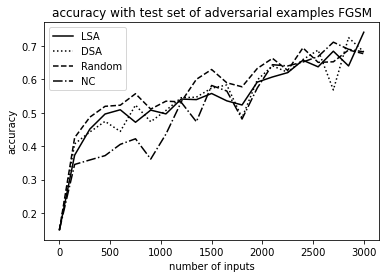

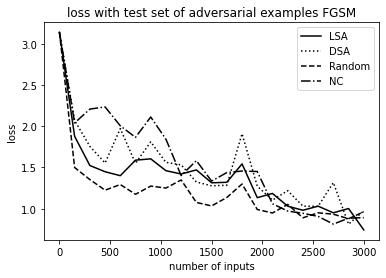

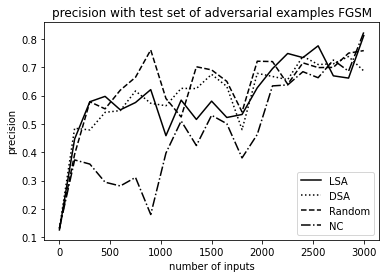

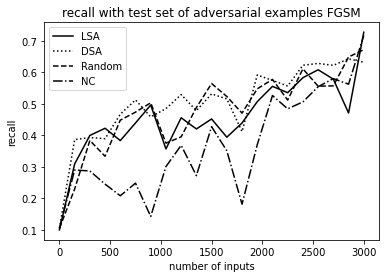

In [93]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#metric = "accuracy" # accuracy loss
my_metrics =["accuracy","loss","precision","recall"]

for metric in my_metrics:
    plt.clf()
    plt.plot(n_inputs,df_evaluate_lsa_0[metric],colors[0],linestyle=linestyles[0])
    plt.plot(n_inputs,df_evaluate_dsa_0[metric],colors[1],linestyle=linestyles[1])
    plt.plot(n_inputs,df_evaluate_random_0[metric],colors[2],linestyle=linestyles[2])
    plt.plot(n_inputs,df_evaluate_nc_0[metric],colors[3],linestyle=linestyles[3])


    legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



    plt.legend(handles=legend_elements)#
    plt.title(metric + " with test set of adversarial examples FGSM")
    #plt.xlim([0, 4000])
    #plt.ylim([0, 1])
    plt.xlabel('number of inputs')
    plt.ylabel(metric)
    plt.savefig("intel_c3_"+metric + "_0.svg")

    plt.show()

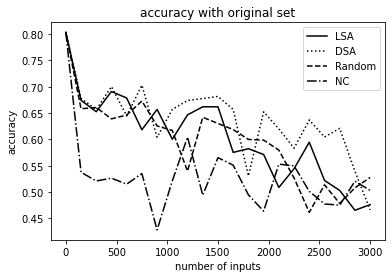

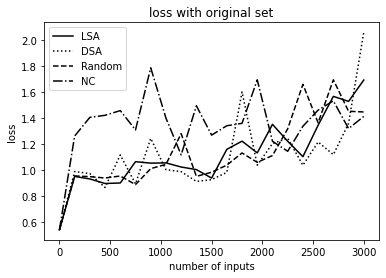

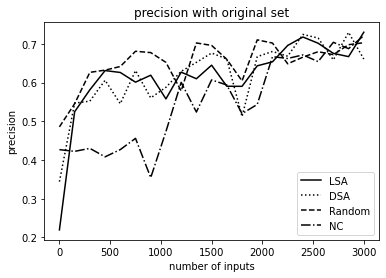

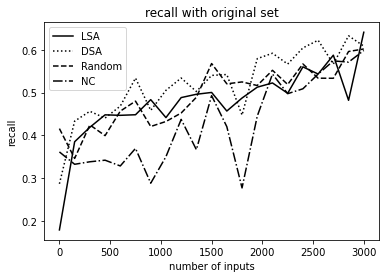

In [94]:
#configuration 2
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

my_metrics =["accuracy","loss","precision","recall"]

for metric in my_metrics:
    
#metric = "accuracy" # accuracy loss
    plt.clf()
    plt.plot(n_inputs,df_evaluate_lsa_1[metric],colors[0],linestyle=linestyles[0])
    plt.plot(n_inputs,df_evaluate_dsa_1[metric],colors[1],linestyle=linestyles[1])
    plt.plot(n_inputs,df_evaluate_random_1[metric],colors[2],linestyle=linestyles[2])
    plt.plot(n_inputs,df_evaluate_nc_1[metric],colors[3],linestyle=linestyles[3])


    legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



    plt.legend(handles=legend_elements)#
    plt.title(metric + " with original set")
    #plt.xlim([0, 40000])
    #plt.ylim([0, 1])
    
    plt.xlabel('number of inputs')
    plt.ylabel(metric)
    plt.savefig("intel_c3_"+metric + "_1.svg")

    plt.show()

In [ ]:
import numpy as np
accuracy_c2_lsa_3 = (np.array(accuracy_c2_lsa)+np.array(accuracy_c2_lsa_1))/2
accuracy_c2_dsa_3 = (np.array(accuracy_c2_dsa)+np.array(accuracy_c2_dsa_1))/2
accuracy_c2_nc_3 = (np.array(accuracy_c2_nc)+np.array(accuracy_c2_nc_1))/2
accuracy_c2_random_3 = (np.array(accuracy_c2_random)+np.array(accuracy_c2_random_1))/2


2400 0.6256666779518127
2400 0.6478333473205566
1500 0.629666656255722
2850 0.6049999892711639


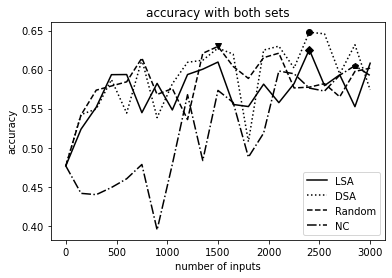

In [95]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.plot(n_inputs,accuracy_c3_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_c3_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_c3_random_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_c3_nc_3,colors[3],linestyle=linestyles[3])



legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



plt.legend(handles=legend_elements)#
plt.title("accuracy with both sets")

print(n_inputs[np.argmax(accuracy_c3_lsa_3)],accuracy_c3_lsa_3.max())
print(n_inputs[np.argmax(accuracy_c3_dsa_3)],accuracy_c3_dsa_3.max())
print(n_inputs[np.argmax(accuracy_c3_random_3)],accuracy_c3_random_3.max())
print(n_inputs[np.argmax(accuracy_c3_nc_3)],accuracy_c3_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_c3_lsa_3)],accuracy_c3_lsa_3.max(),'-kD')
plt.plot(n_inputs[np.argmax(accuracy_c3_dsa_3)],accuracy_c3_dsa_3.max(),'-ko')
plt.plot(n_inputs[np.argmax(accuracy_c3_random_3)],accuracy_c3_random_3.max(),'-kv')
plt.plot(n_inputs[np.argmax(accuracy_c3_nc_3)],accuracy_c3_nc_3.max(),'-kp')

plt.xlabel('number of inputs')
plt.ylabel('accuracy')
#plt.xlim([0, 40000])
#plt.ylim([0, 1])
plt.savefig("intel_c3_"+"accuracy" + "_both.svg")

plt.show()

In [ ]:
def get_performance(n_inputs,acc_original,acc_adversarial):
    lev = 0.95
    good_adv = max(acc_adversarial)*lev
    good_original = max(acc_original)*lev
    print(good_adv)
    print(good_original)
    perf_idx = 0
    for i in range(len(acc_adversarial)):
        if(acc_adversarial[i]>=good_adv):
            print(i)
            perf_idx = i
            break
    for i in range(len(acc_original)):
        if(acc_original[i]>=good_original):
            print(i)
            if(i>perf_idx):
                perf_idx = i
                break        
    return n_inputs[perf_idx]
        
    


In [ ]:
get_performance(n_inputs,accuracy_c2_lsa_1,accuracy_c2_lsa)

In [ ]:
get_performance(n_inputs,accuracy_c2_dsa_1,accuracy_c2_dsa)

In [ ]:
get_performance(n_inputs,accuracy_c2_random_1,accuracy_c2_random)

In [ ]:
get_performance(n_inputs,accuracy_c2_nc_1,accuracy_c2_nc)

In [ ]:
def get_perf(n_inputs,acc_original,acc_adversarial):
    res = np.array(acc_original)+np.array(acc_adversarial)
    res = list(res/2)
    print(res)
    return n_inputs[res.index(max(res))]

In [ ]:
print(get_perf(n_inputs,accuracy_c2_lsa_1,accuracy_c2_lsa))
print(get_perf(n_inputs,accuracy_c2_dsa_1,accuracy_c2_dsa))
print(get_perf(n_inputs,accuracy_c2_random_1,accuracy_c2_random))
print(get_perf(n_inputs,accuracy_c2_nc_1,accuracy_c2_nc))


## saving

In [64]:
#models_lsa = [model_c2_lsa_1,model_c2_lsa_2,model_c2_lsa_3,model_c2_lsa_4,model_c2_lsa_5]
#model_lsa_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/config_1/intel_model_c2_sep_lsa_e1"
new_model_lsa_dir  = "D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2"

i=0
for model in models_lsa:
    model.save(new_model_lsa_dir+"_"+str(i))
    i+=1
    
    
 

INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_lsa_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/int

In [65]:
new_model_dsa_dir  = "D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2"


i=0
for model in models_dsa:
    model.save(new_model_dsa_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_dsa_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/int

In [66]:
new_model_random_dir  = "D:/models/intel_models/C3/intel_model_c3_sep_random_e2"

i=0
for model in models_random:
    model.save(new_model_random_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_random_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/mo

In [67]:
#models_nc = [model_c2_nc_1,model_c2_nc_2,model_c2_nc_3,model_c2_nc_4,model_c2_nc_5]
#model_nc_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/config_1/intel_model_c2_sep_nc_e1"

new_model_nc_dir  = "D:/models/intel_models/C3/intel_model_c3_sep_nc_e2"

i=0
for model in models_nc:
    model.save(new_model_nc_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model_c3_sep_nc_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C3/intel_model